# Exploring DNN Fits

## Configuration

In [1]:
import sys
sys.path.extend(['..', '../bprime'])
    
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [144]:
import os
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from bprime.learn import LearnedFunction, LearnedB
from bprime.theory import bgs_segment, bgs_rec
from bprime.plots import bhat_plot, loss_plot, loss_limits_plot, rate_loss_plot
from bprime.plots import b_learn_diagnostic_plot, rate_plot, arch_loss_plot, rate_density_plot
from bprime.plots import B_loss_plot
from bprime.nb_utils import load_learnedfuncs_in_dir
os.environ["CUDA_VISIBLE_DEVICES"]="1,1"

In [3]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200
plt.style.use('./buffalo.mplstyle')

In [109]:
FIT_DIR = '../data/msprime_sims/fits/'

models = os.listdir(FIT_DIR)

res = {m: load_learnedfuncs_in_dir(os.path.join(FIT_DIR, m)) for m in models}

res.keys()

dict_keys(['simple_varL_varrbp', 'segment_best_largesample', 'simple_varL_varlog10rbp', 'simple', 'segment_uniform_mu', 'segment', 'segment_best', 'simple_varL'])

Throughout we use a single architecture that has a fair amount of capacity.

In [13]:
ARCH = (8, 4)

## Simple BGS model

First we look at the simple BGS model, which just includes the total fixed recombination fraction. This is the same as `bgs_rec()` in the `bprime.theory` module.

The model is:

$$B_\mathrm{rec} = \exp\left({\frac{-\mu L}{(t(1+(1-t)r_\mathrm{BP}/t)^2)}}\right)$$

where $t = sh$.

### Variable $\mu$ and $t$

In [39]:
res['simple'][ARCH][0].func

LearnedFunction with 2 feature(s) and 1 target(s)
 variable feature(s):
  - sh ∈ [-4.3, -1.3] (log10, <ufunc 'log10'>)
  - mu ∈ [-10, -5] (log10, <ufunc 'log10'>)
 fixed fixed(s) (based on metadata):
  - N = 1000
  - rbp = 1e-08
  - L = 1000
Features normalized? True
Features split? True, test size: 30.0% (n=150,000)
Total size: 500,000

(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 0, n32 = 2'}, xlabel='epoch'>)

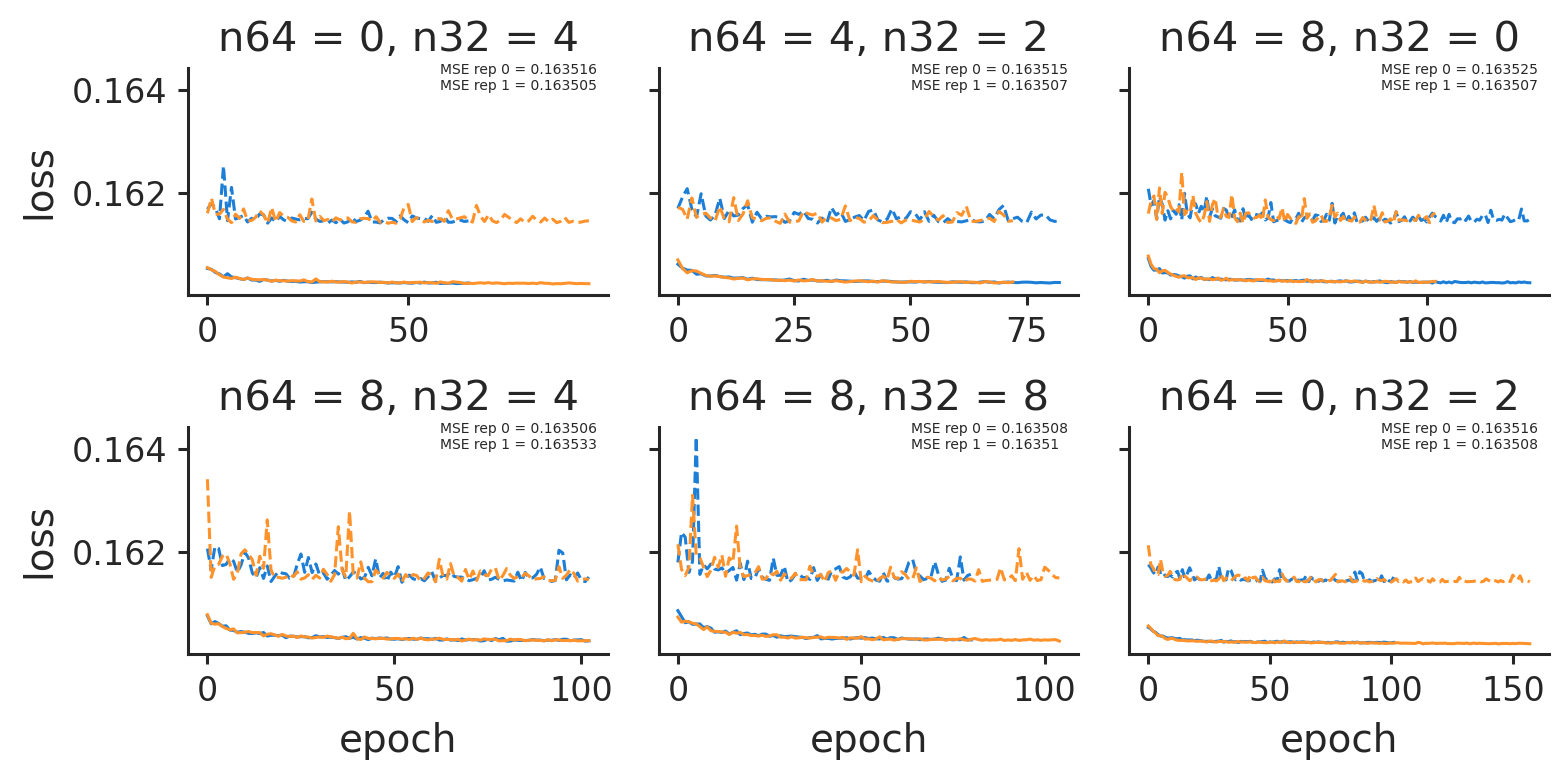

In [14]:
arch_loss_plot(res['simple'])

Really not much of a difference here -- it's fairly insensitive to the architecture for this simple function.

making 100x100 grid...	done.
313/313 [==============================] - 0s 778us/step
using cached predictions
using cached predictions
using cached predictions


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

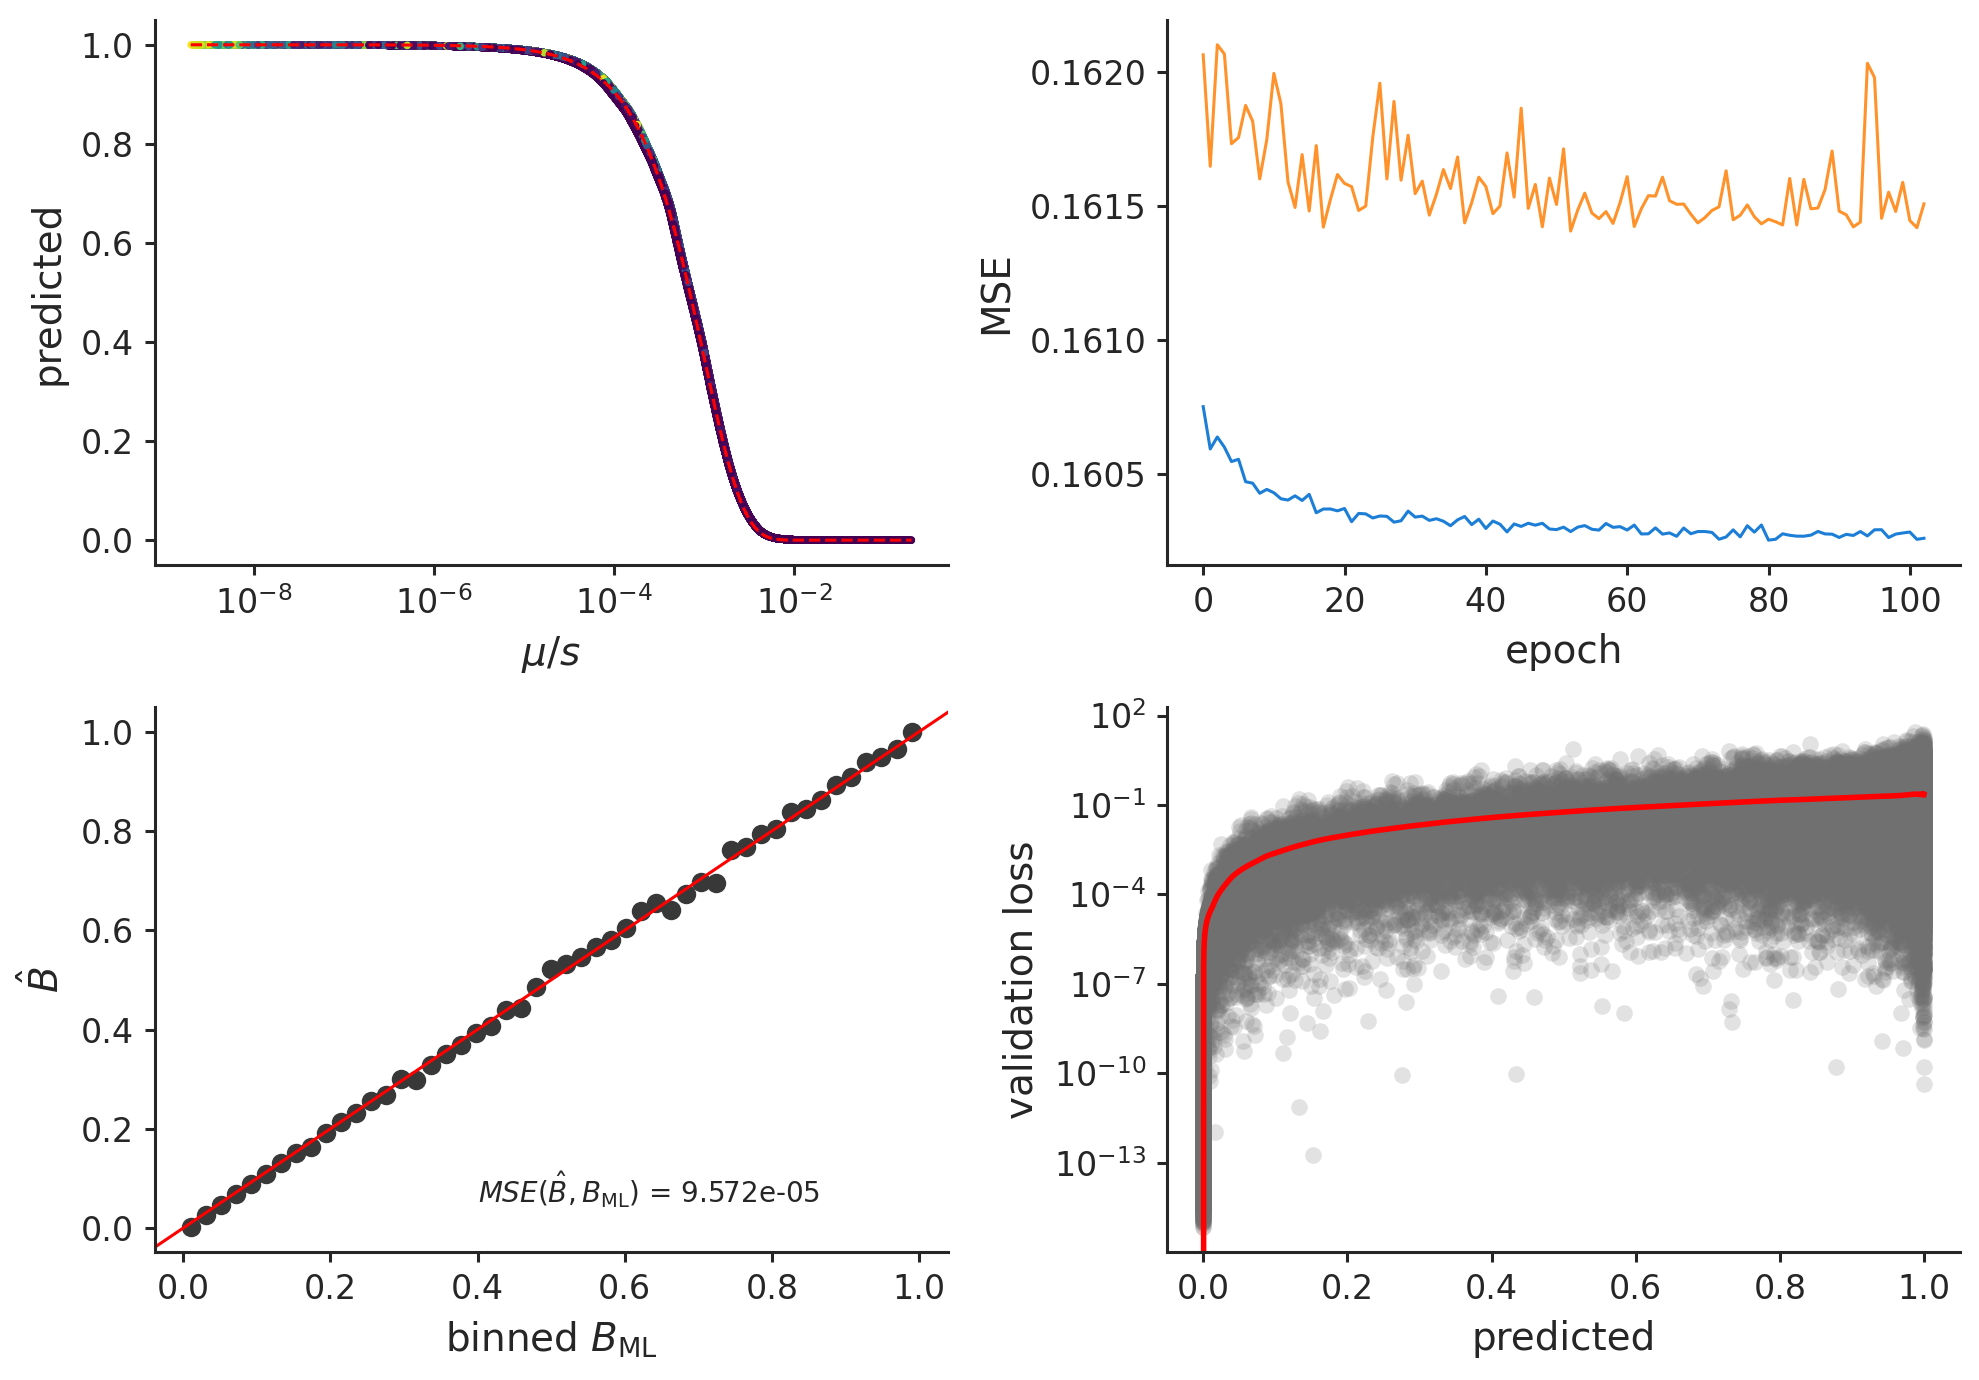

In [17]:
b_learn_diagnostic_plot(res['simple'][ARCH][0], n={'mu': 100, 'sh': 100}, c='sh')

### Variable $\mu$, $t$, and $L$

In [38]:
res['simple_varL'][ARCH][0].func

LearnedFunction with 3 feature(s) and 1 target(s)
 variable feature(s):
  - sh ∈ [-4.3, -1.3] (log10, <ufunc 'log10'>)
  - mu ∈ [-10, -5] (log10, <ufunc 'log10'>)
  - L ∈ [1, 1000] (linear, None)
 fixed fixed(s) (based on metadata):
  - N = 1000
  - rbp = 1e-08
Features normalized? True
Features split? True, test size: 30.0% (n=150,000)
Total size: 500,000

(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 8, n32 = 4'}, xlabel='epoch'>)

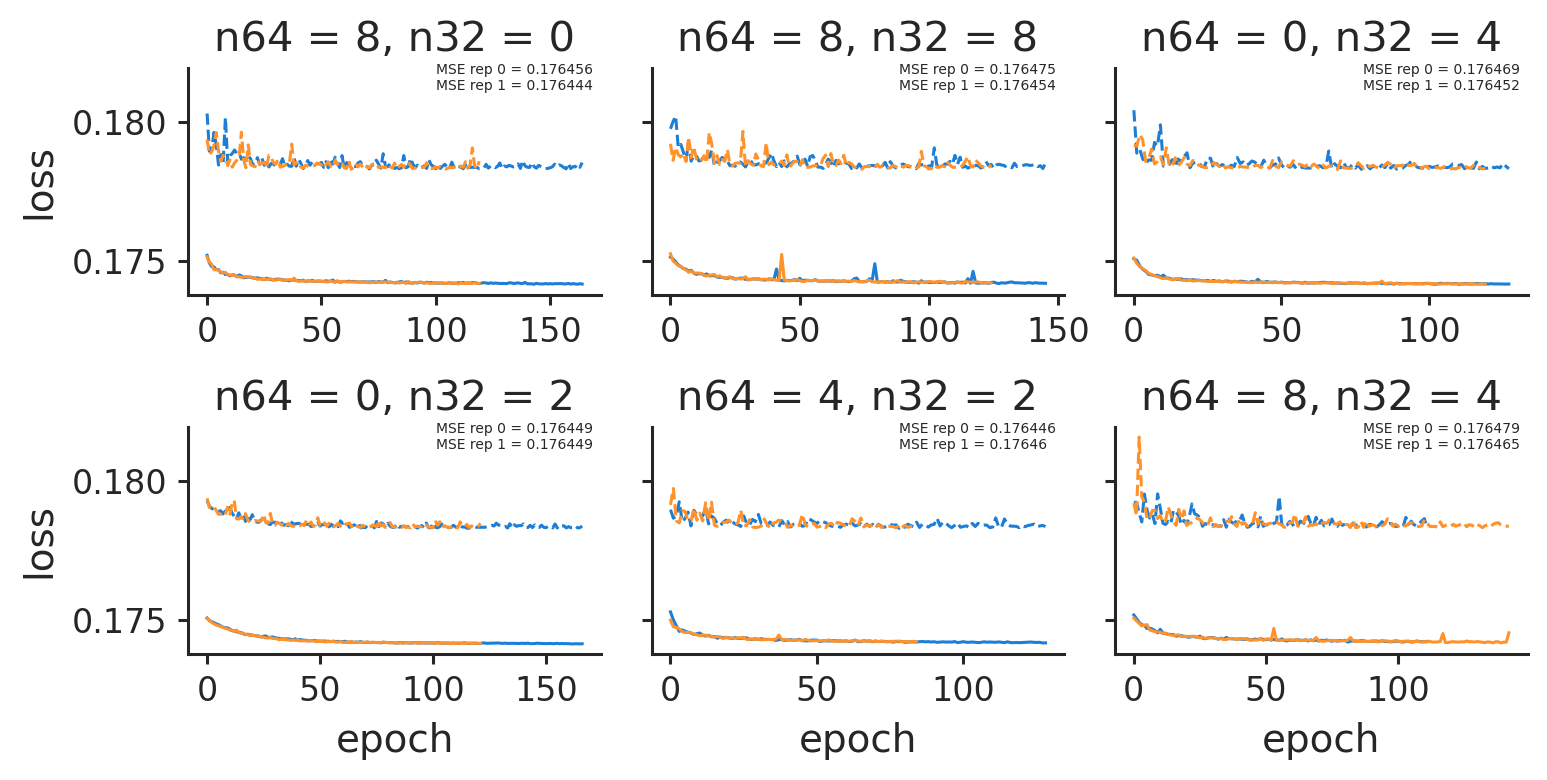

In [27]:
arch_loss_plot(res['simple_varL'])

using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

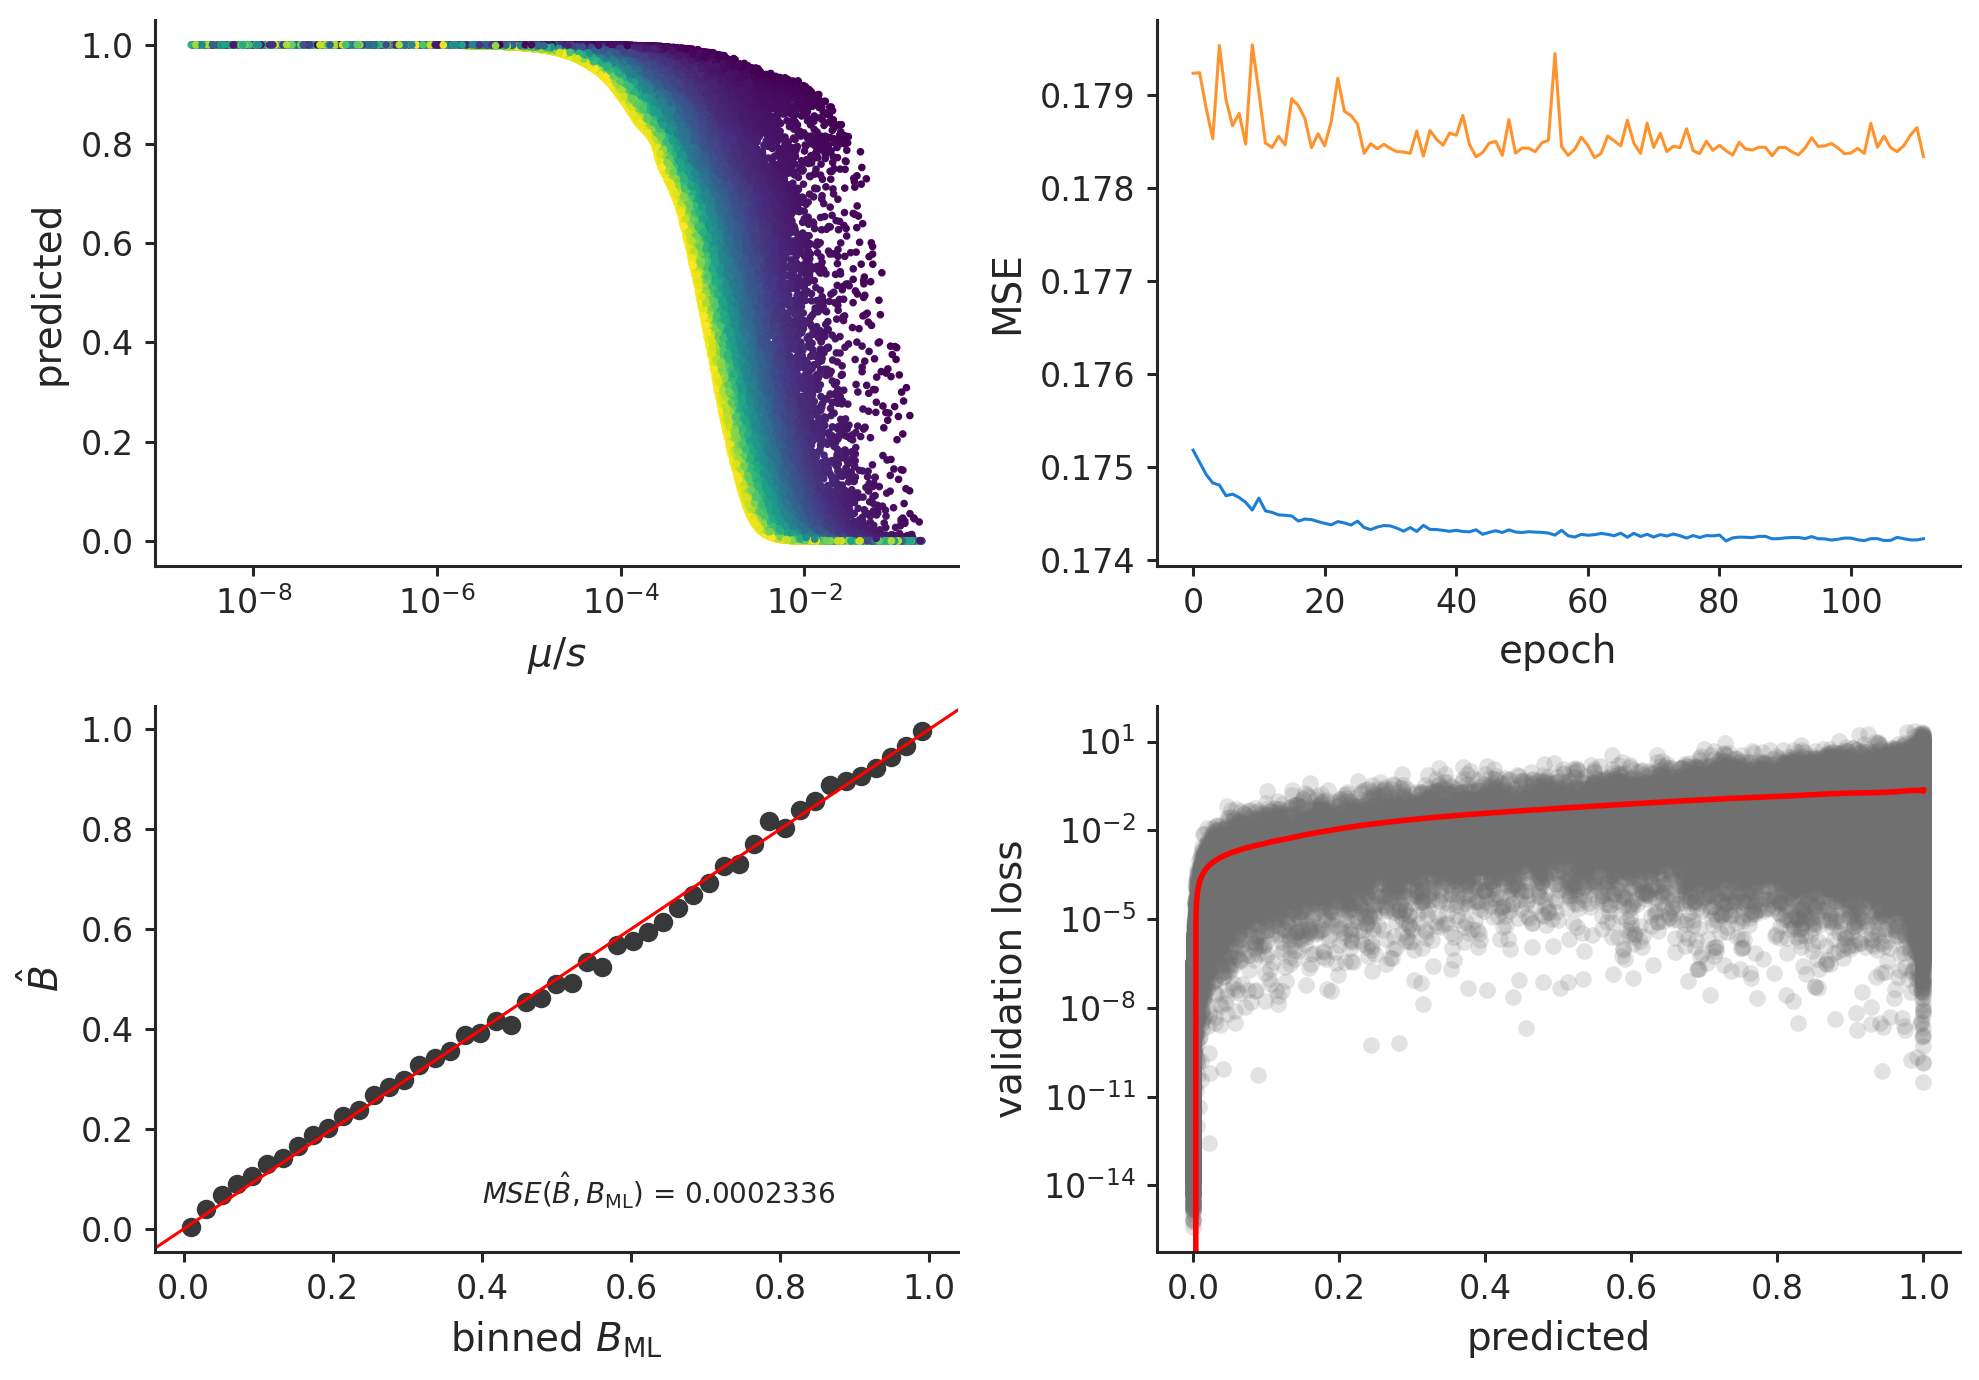

In [28]:
b_learn_diagnostic_plot(res['simple_varL'][ARCH][0], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10}, c='L', add_theory=False)

### Variable $\mu$, $t$, $L$, and $r_\mathrm{BP}$

Notably, $r_\mathrm{BP}$ is on a linear scale here. 

In [49]:
res['simple_varL_varrbp'][ARCH][0].func

LearnedFunction with 4 feature(s) and 1 target(s)
 variable feature(s):
  - rbp ∈ [1e-10, 1e-07] (linear, None)
  - sh ∈ [-4.3, -1.3] (log10, <ufunc 'log10'>)
  - L ∈ [1, 1000] (linear, None)
  - mu ∈ [-10, -5] (log10, <ufunc 'log10'>)
 fixed fixed(s) (based on metadata):
  - N = 1000
Features normalized? True
Features split? True, test size: 30.0% (n=150,000)
Total size: 500,000

(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 8, n32 = 8'}, xlabel='epoch'>)

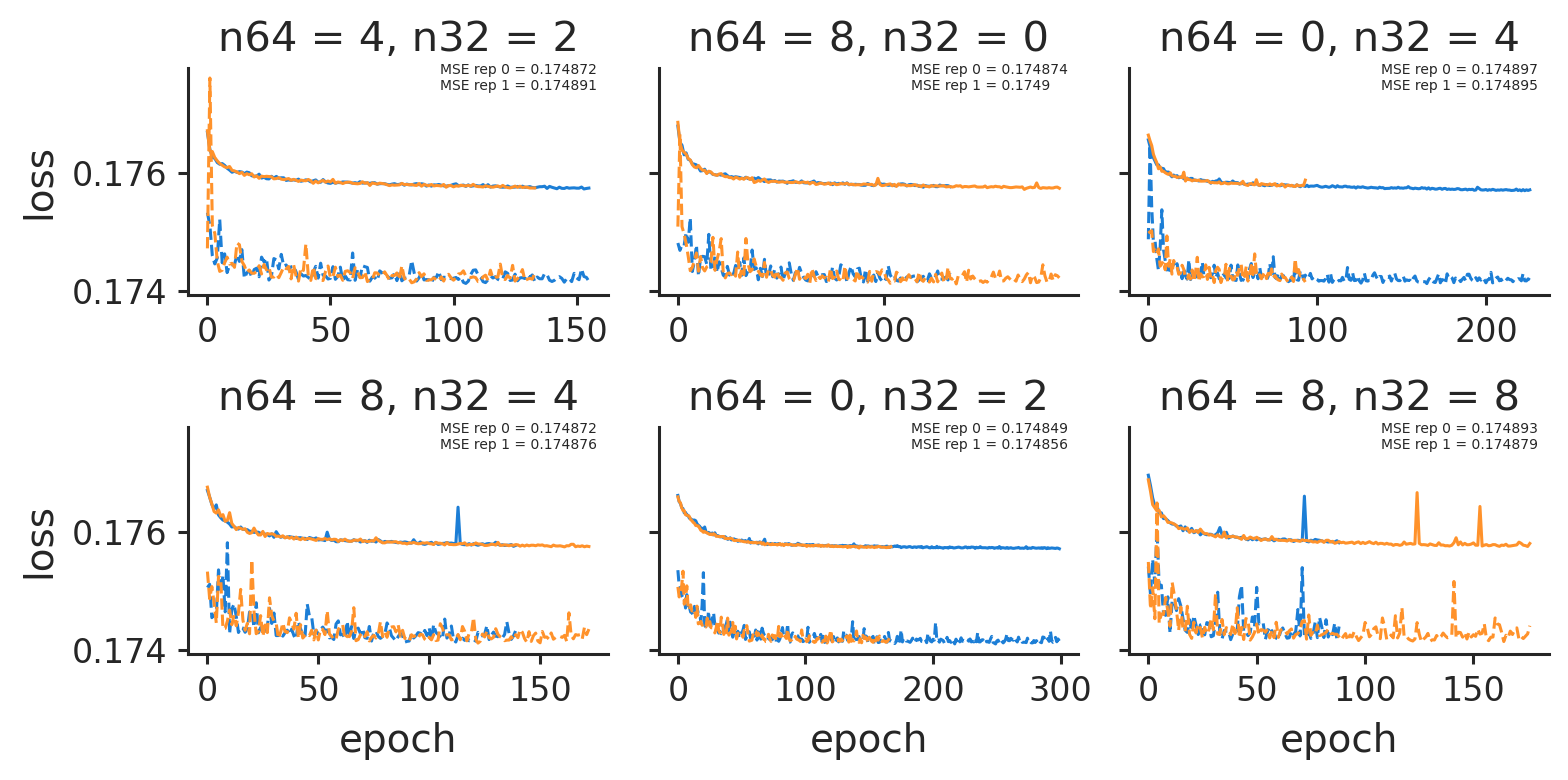

In [50]:
arch_loss_plot(res['simple_varL_varrbp'])

using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

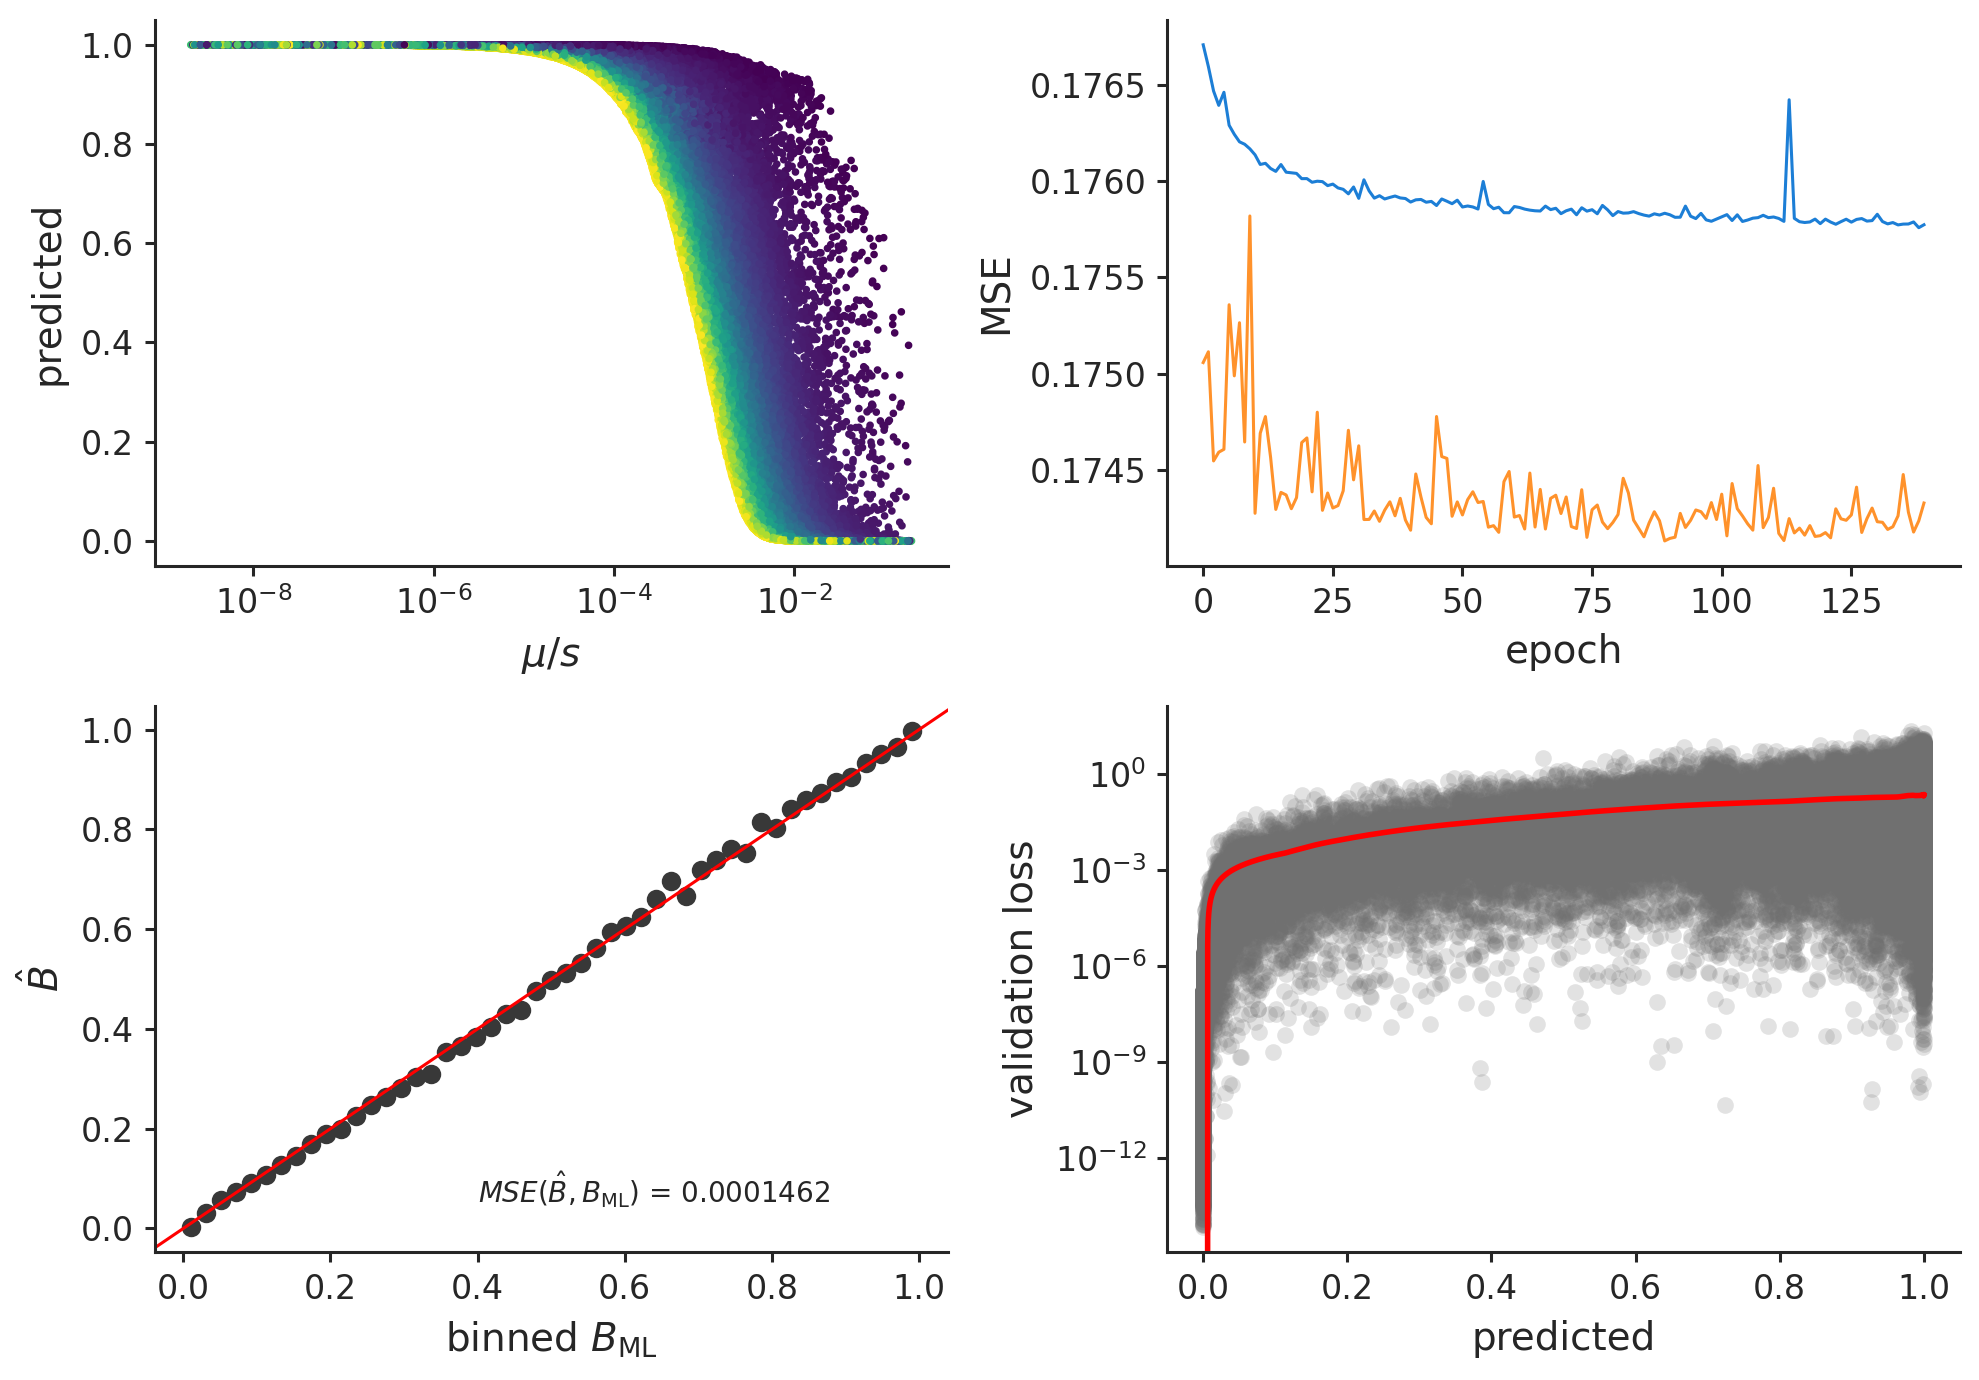

In [48]:
b_learn_diagnostic_plot(res['simple_varL_varrbp'][ARCH][0], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)

## Segment BGS Model

$$B_\mathrm{seg} = \exp\left(\int_0^L \frac{dl}{t(1+(1-t)(c + r_\text{BP}l)/t)^2}\right) = \exp\left(\frac{r_\text{BP} L t}{(c  (1-t)+t) ((1-t) r_\text{BP} L +t + c (1 - t))} \right)$$

where $c$ is the recombination fraction between the focal neutral site and the start of the segment with length $L$.

### With $t$, $\mu$, and $L$ on a Linear Scale

In [54]:
res['segment_uniform_mu'][ARCH][0].func

LearnedFunction with 5 feature(s) and 1 target(s)
 variable feature(s):
  - sh ∈ [5e-06, 0.05] (linear, None)
  - mu ∈ [1e-10, 1e-05] (linear, None)
  - rbp ∈ [-10, -6] (log10, <ufunc 'log10'>)
  - L ∈ [1, 1100] (linear, None)
  - rf ∈ [-10, -0.301] (log10, <ufunc 'log10'>)
 fixed fixed(s) (based on metadata):
  - N = 1000
Features normalized? True
Features split? True, test size: 30.0% (n=150,000)
Total size: 500,000

(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 8, n32 = 0'}, xlabel='epoch'>)

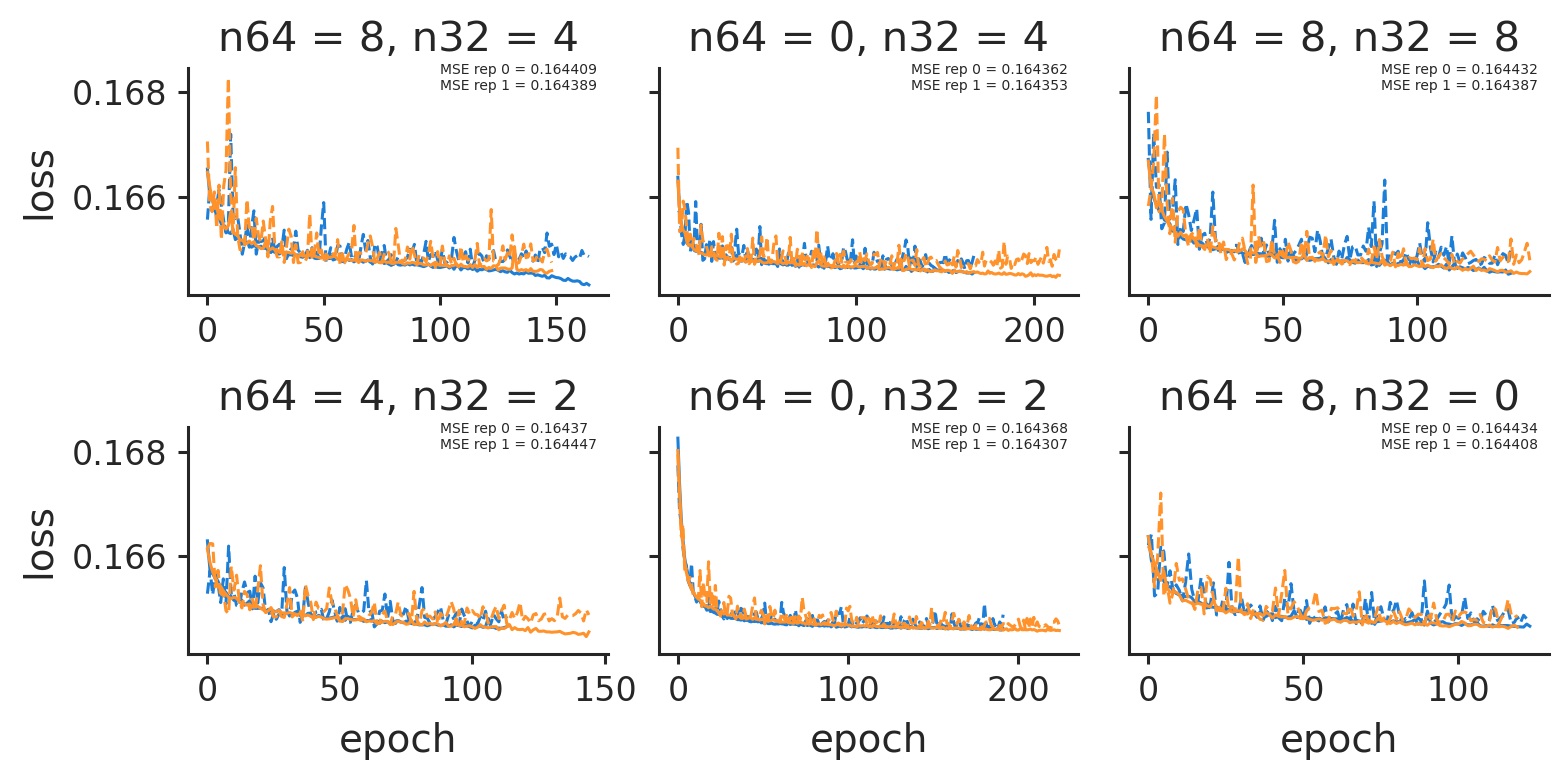

In [55]:
arch_loss_plot(res['segment_uniform_mu'])

Note the difference in the learning histories from earlier simulations. When we look at the predicted values over rate, we see some outliers —failed predictions— caused by using a linear scale for some features:

using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

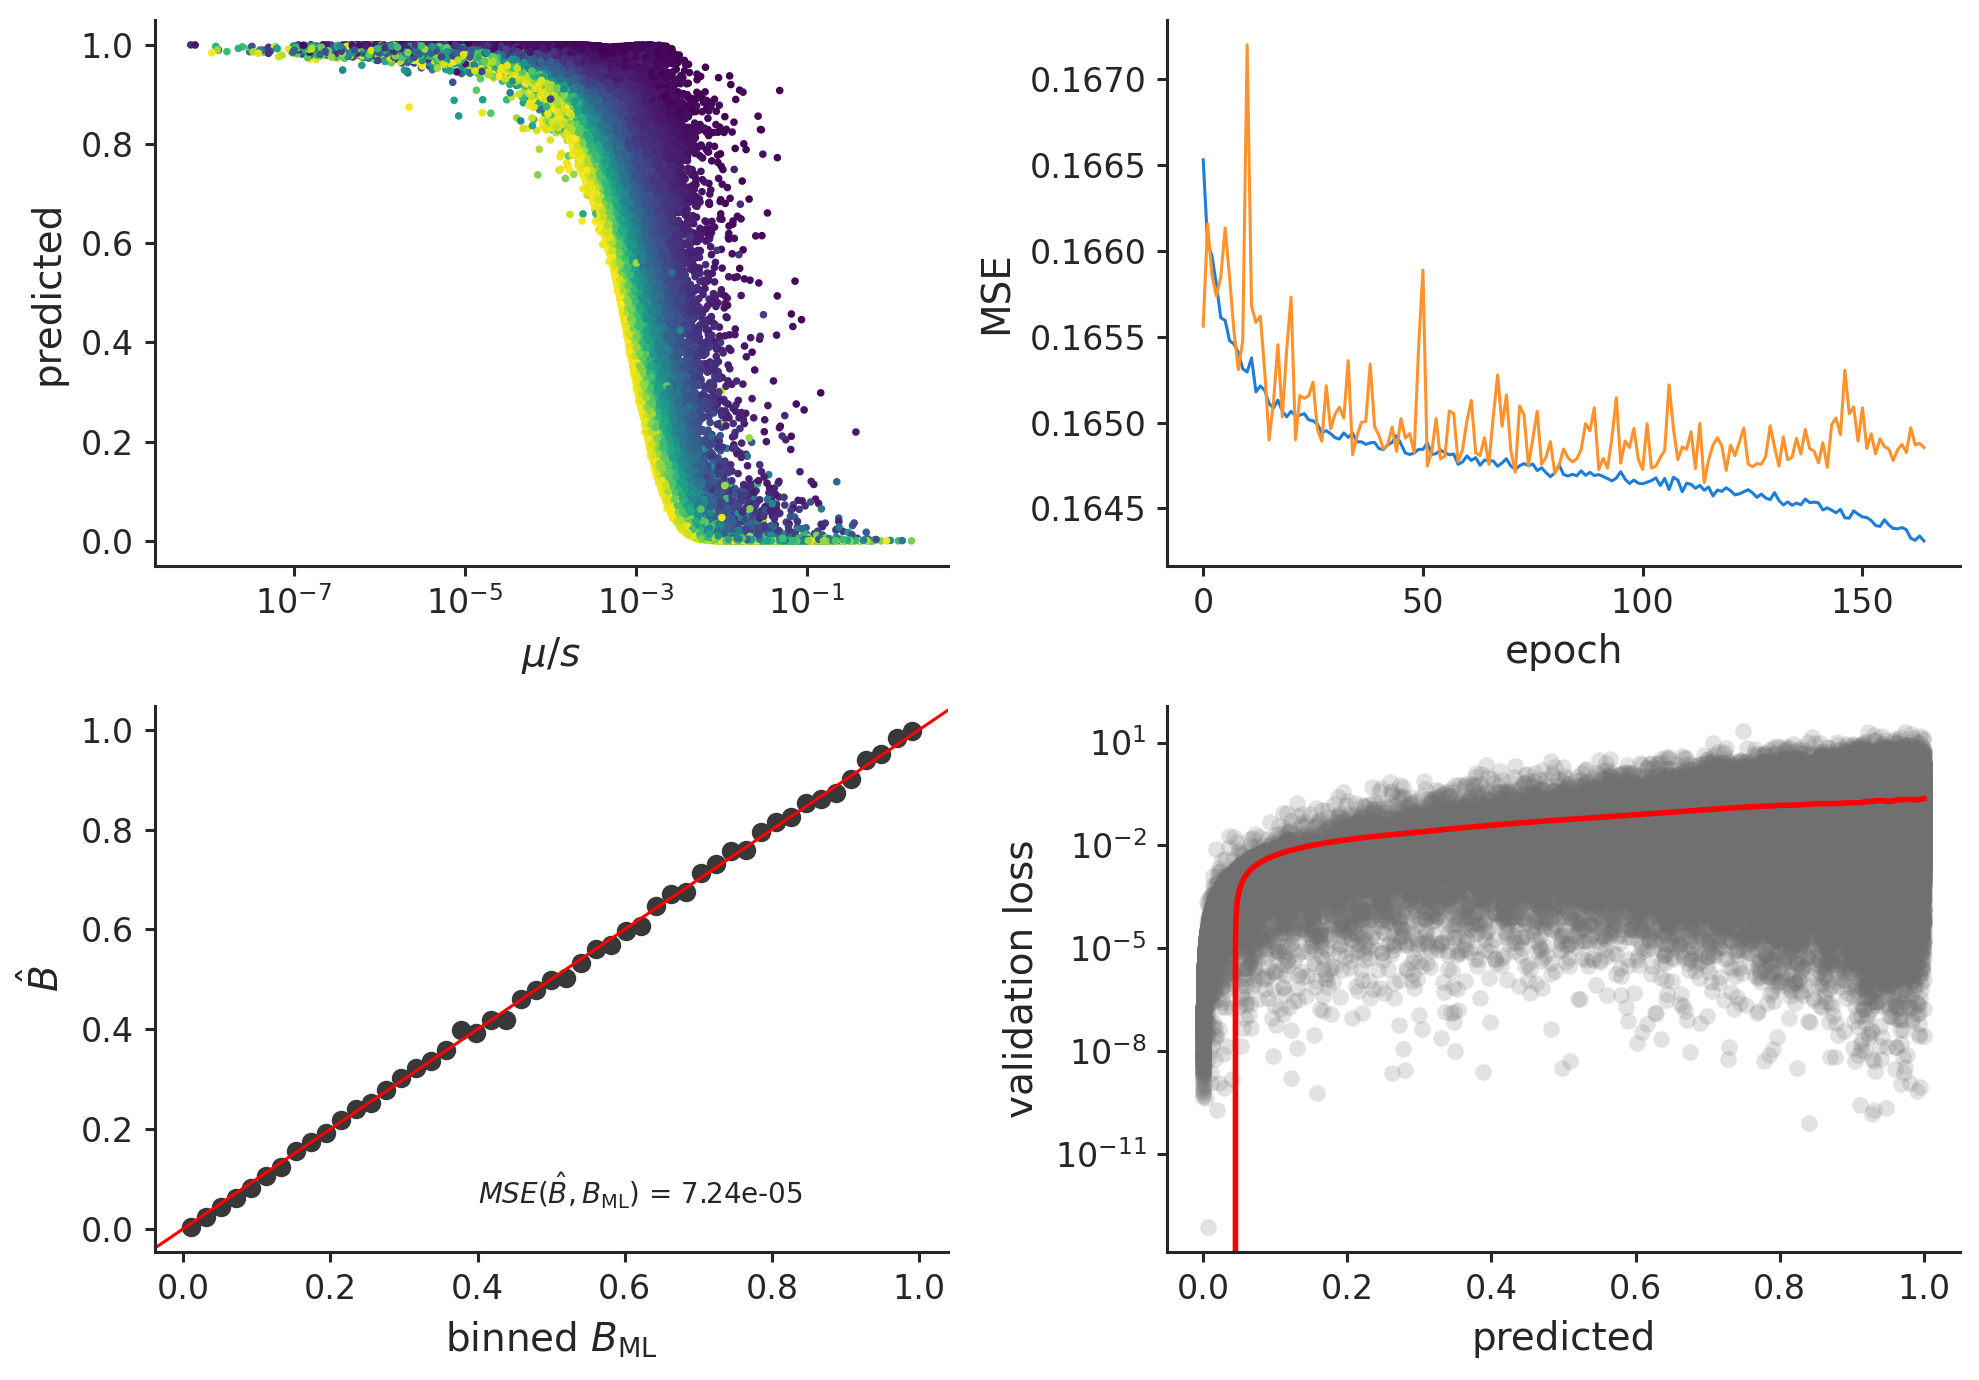

In [56]:
b_learn_diagnostic_plot(res['segment_uniform_mu'][ARCH][0], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)

### With $\mu$ and $L$ on a Linear Scale

In [60]:
res['segment'][ARCH][0].func

LearnedFunction with 5 feature(s) and 1 target(s)
 variable feature(s):
  - mu ∈ [1e-10, 1e-05] (linear, None)
  - sh ∈ [-5.3, -1.3] (log10, <ufunc 'log10'>)
  - rf ∈ [-10, -0.301] (log10, <ufunc 'log10'>)
  - L ∈ [1, 1100] (linear, None)
  - rbp ∈ [-10, -6] (log10, <ufunc 'log10'>)
 fixed fixed(s) (based on metadata):
  - N = 1000
Features normalized? True
Features split? True, test size: 30.0% (n=150,000)
Total size: 500,000

(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 0, n32 = 4'}, xlabel='epoch'>)

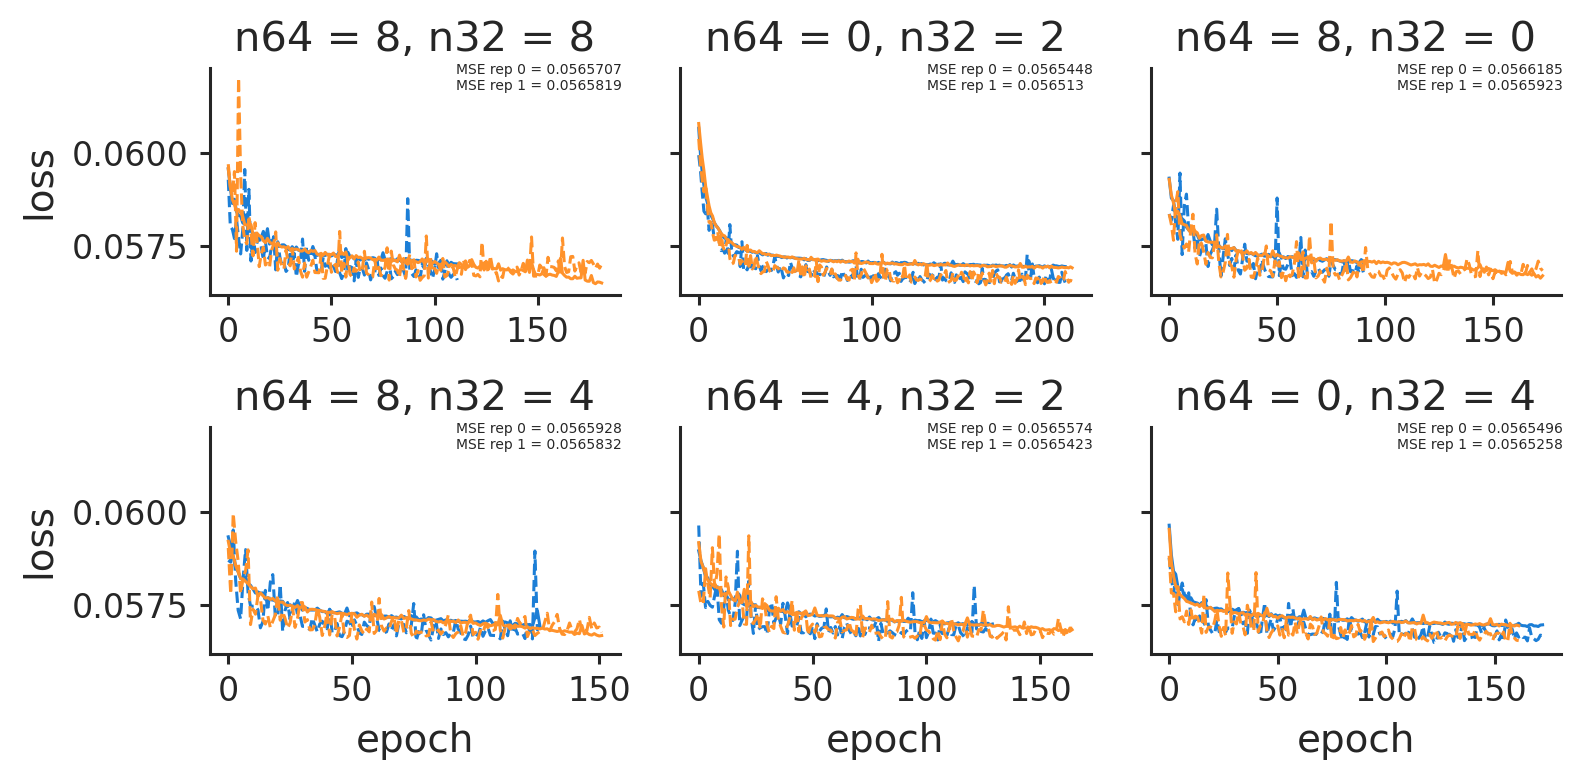

In [62]:
arch_loss_plot(res['segment'])

using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

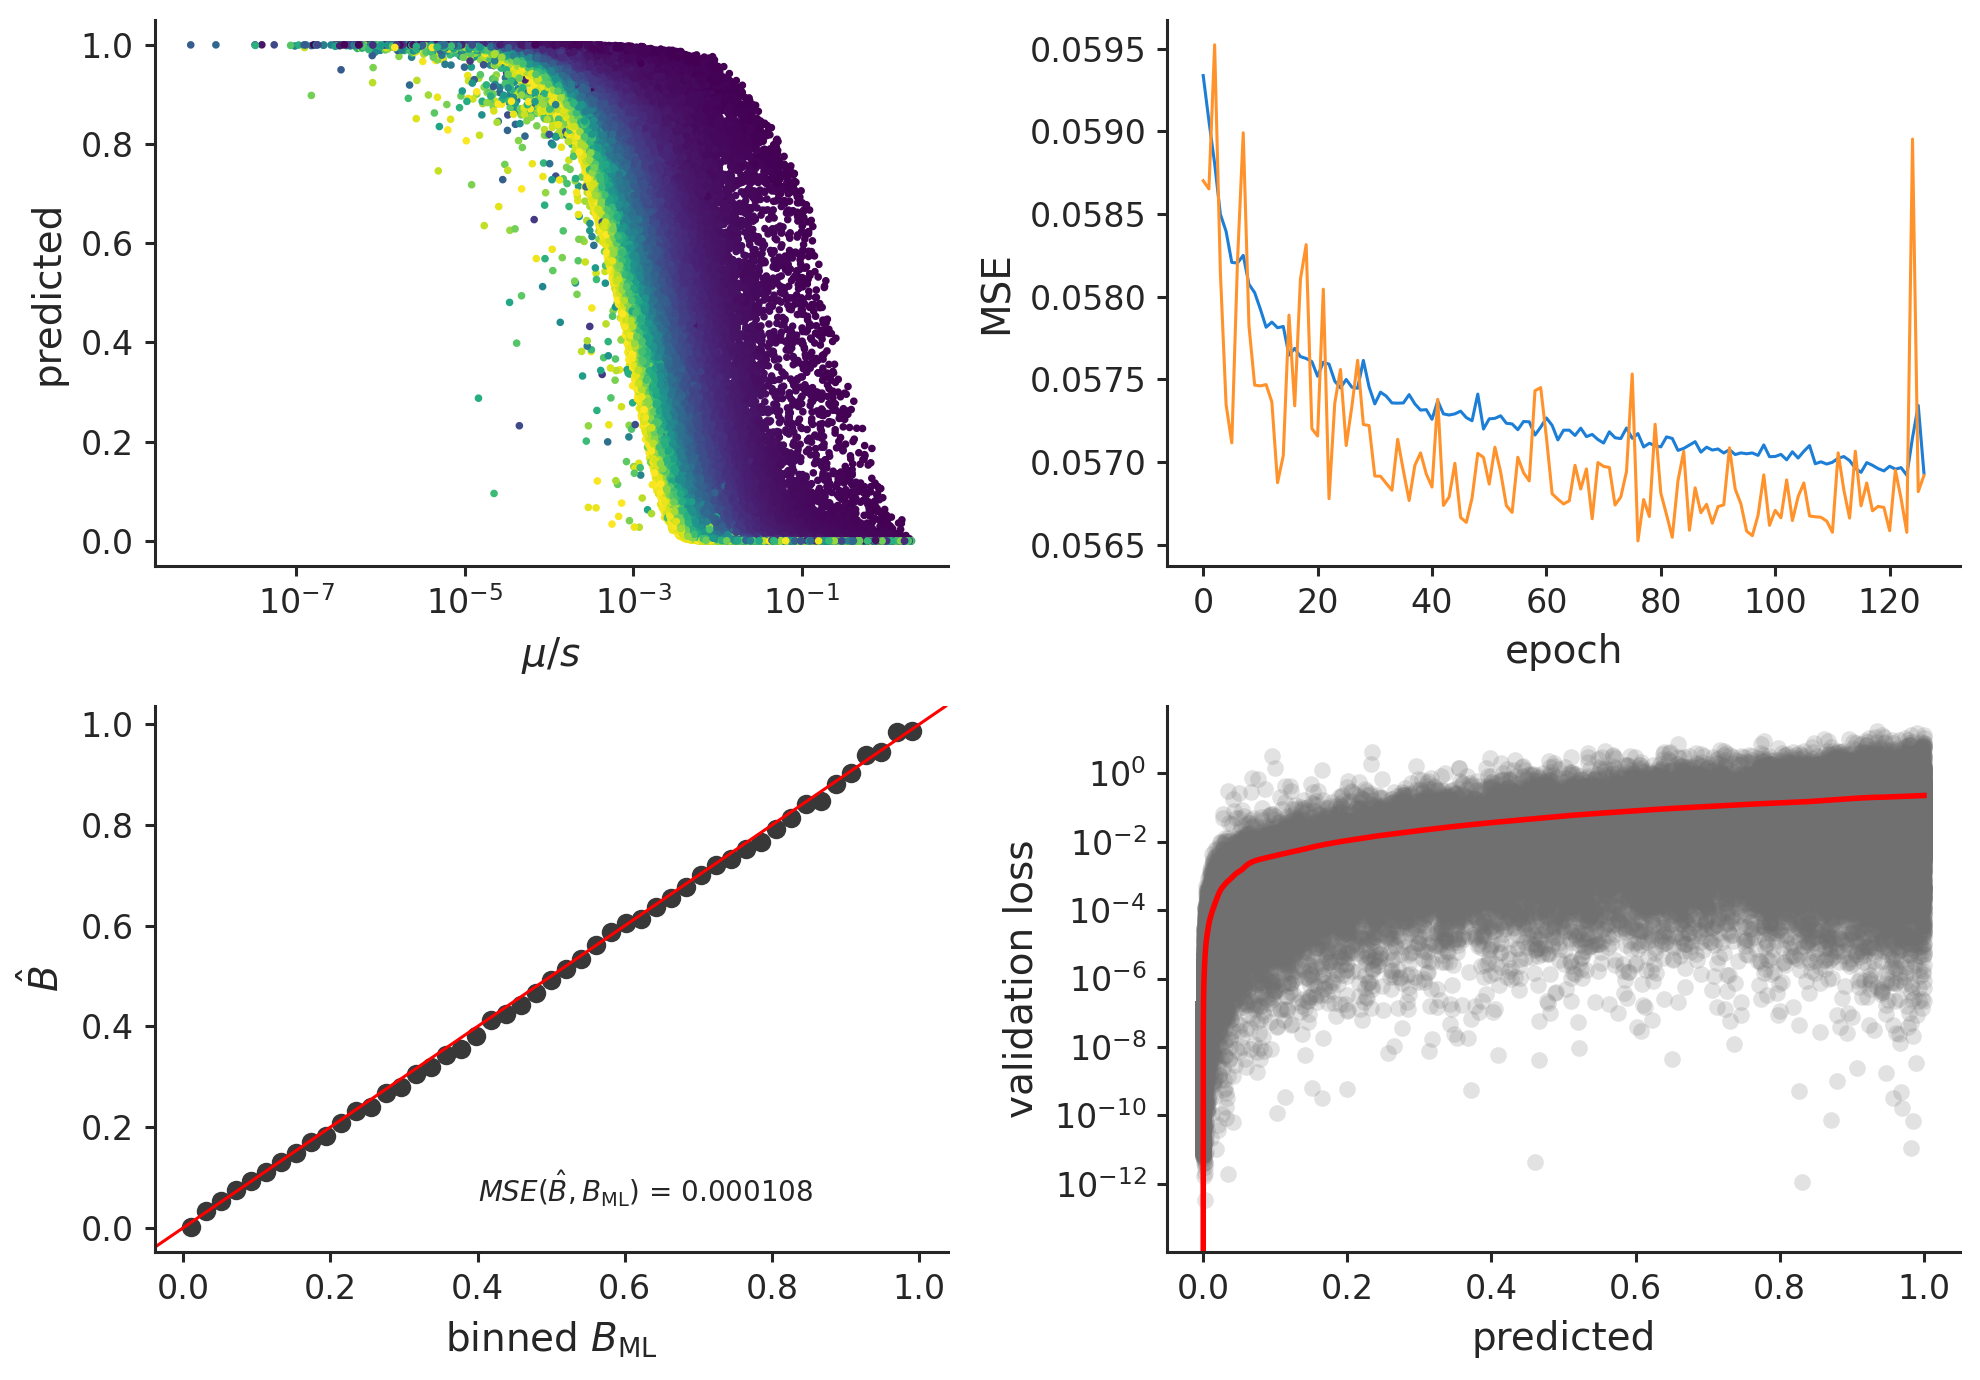

In [61]:
b_learn_diagnostic_plot(res['segment'][ARCH][0], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)

(<Figure size 1600x800 with 2 Axes>,
 array([<AxesSubplot:xlabel='$\\mu/s$', ylabel='density'>,
        <AxesSubplot:xlabel='$B_\\mathrm{theory}$', ylabel='density'>],
       dtype=object))

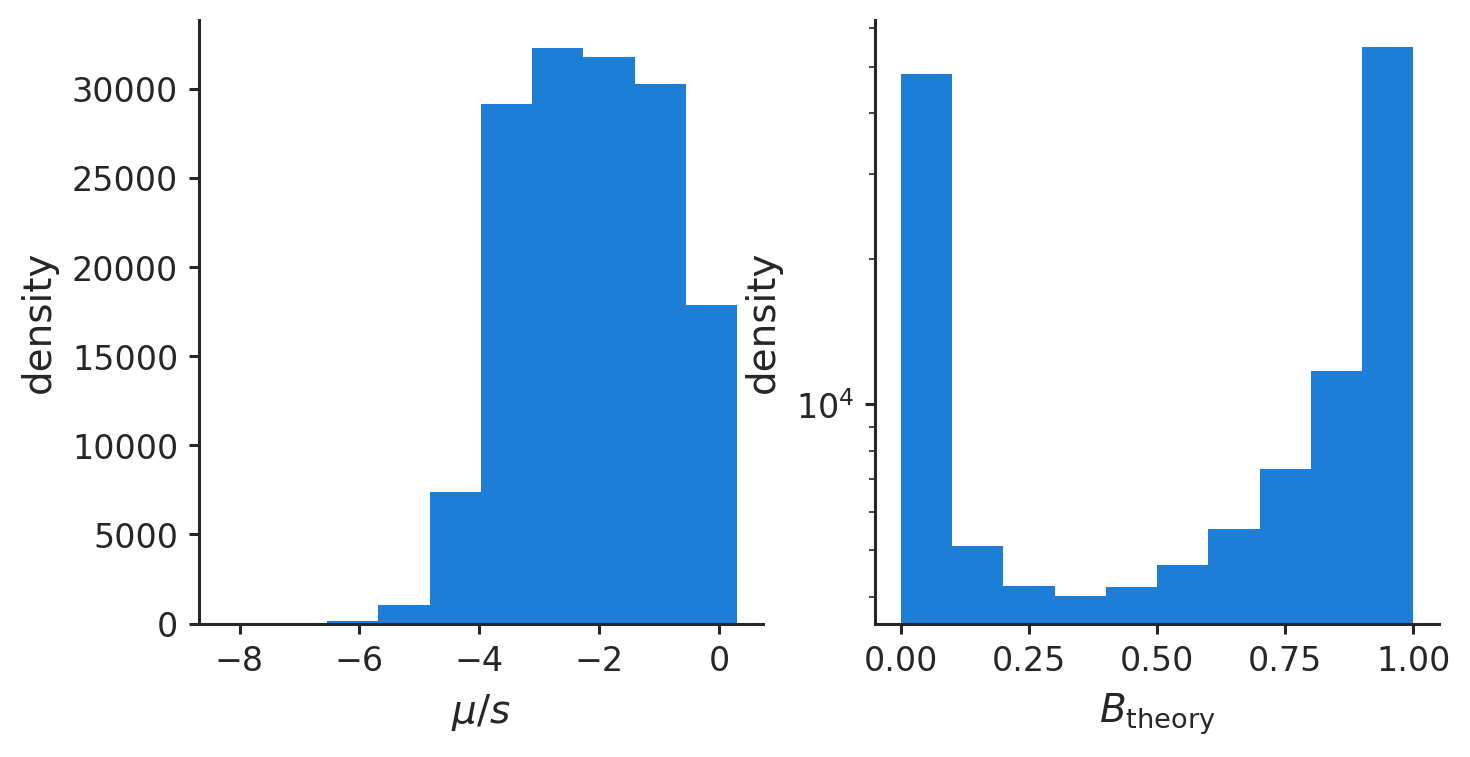

In [163]:
rate_density_plot(res['segment'][ARCH][0])

### Best Segment Parameter Space - $\mu$ and $t$ on log scales

In [64]:
res['segment_best'][ARCH][0].func

LearnedFunction with 5 feature(s) and 1 target(s)
 variable feature(s):
  - rf ∈ [-10, -0.301] (log10, <ufunc 'log10'>)
  - sh ∈ [-5.3, -1.3] (log10, <ufunc 'log10'>)
  - L ∈ [1, 1100] (linear, None)
  - rbp ∈ [-10, -6] (log10, <ufunc 'log10'>)
  - mu ∈ [-10, -5] (log10, <ufunc 'log10'>)
 fixed fixed(s) (based on metadata):
  - N = 1000
Features normalized? True
Features split? True, test size: 30.0% (n=150,000)
Total size: 500,000

(<Figure size 1600x800 with 6 Axes>,
 <AxesSubplot:title={'center':'n64 = 8, n32 = 8'}, xlabel='epoch'>)

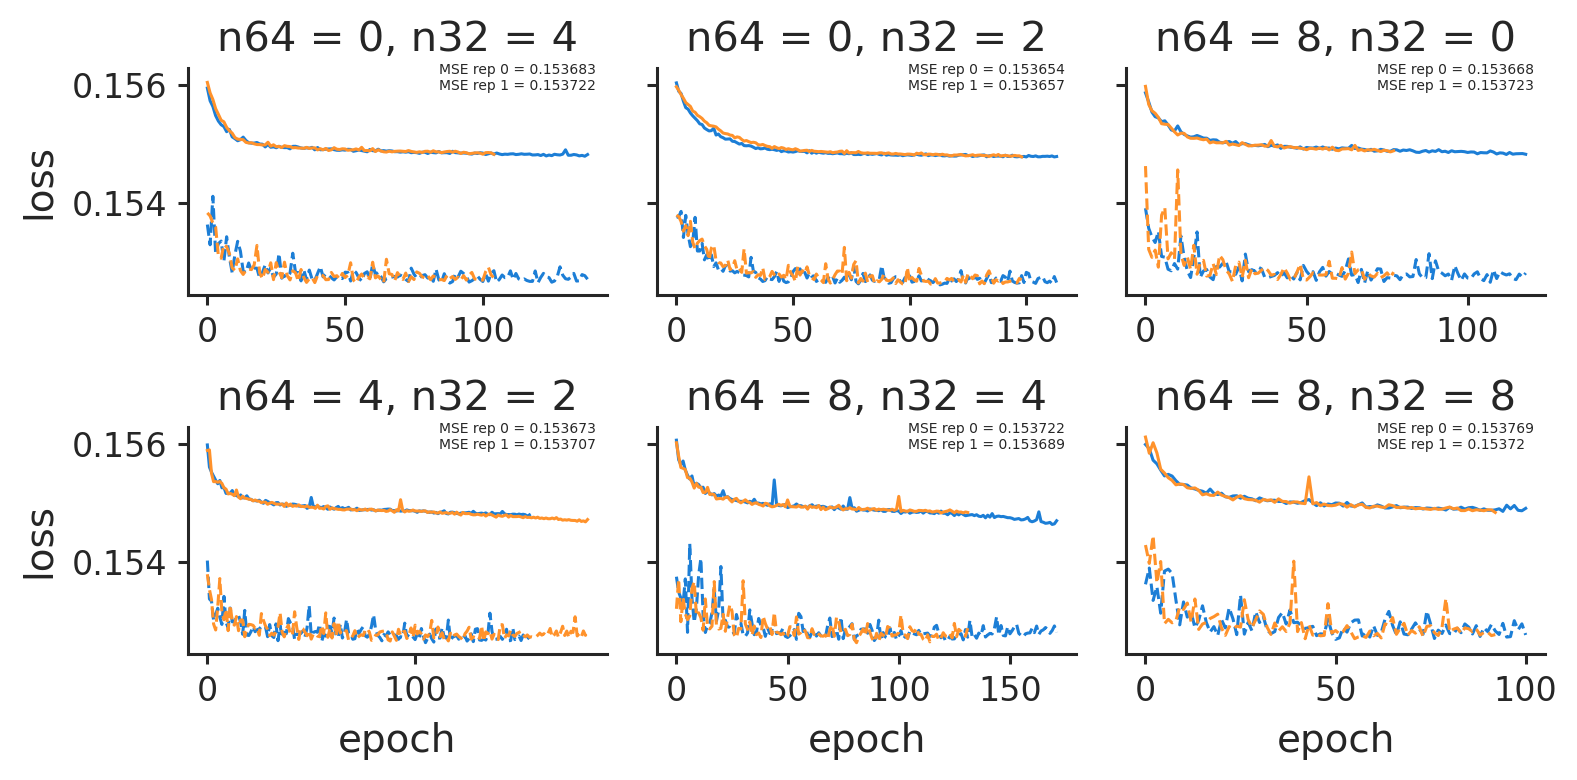

In [74]:
arch_loss_plot(res['segment_best'])

using cached predictions
using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

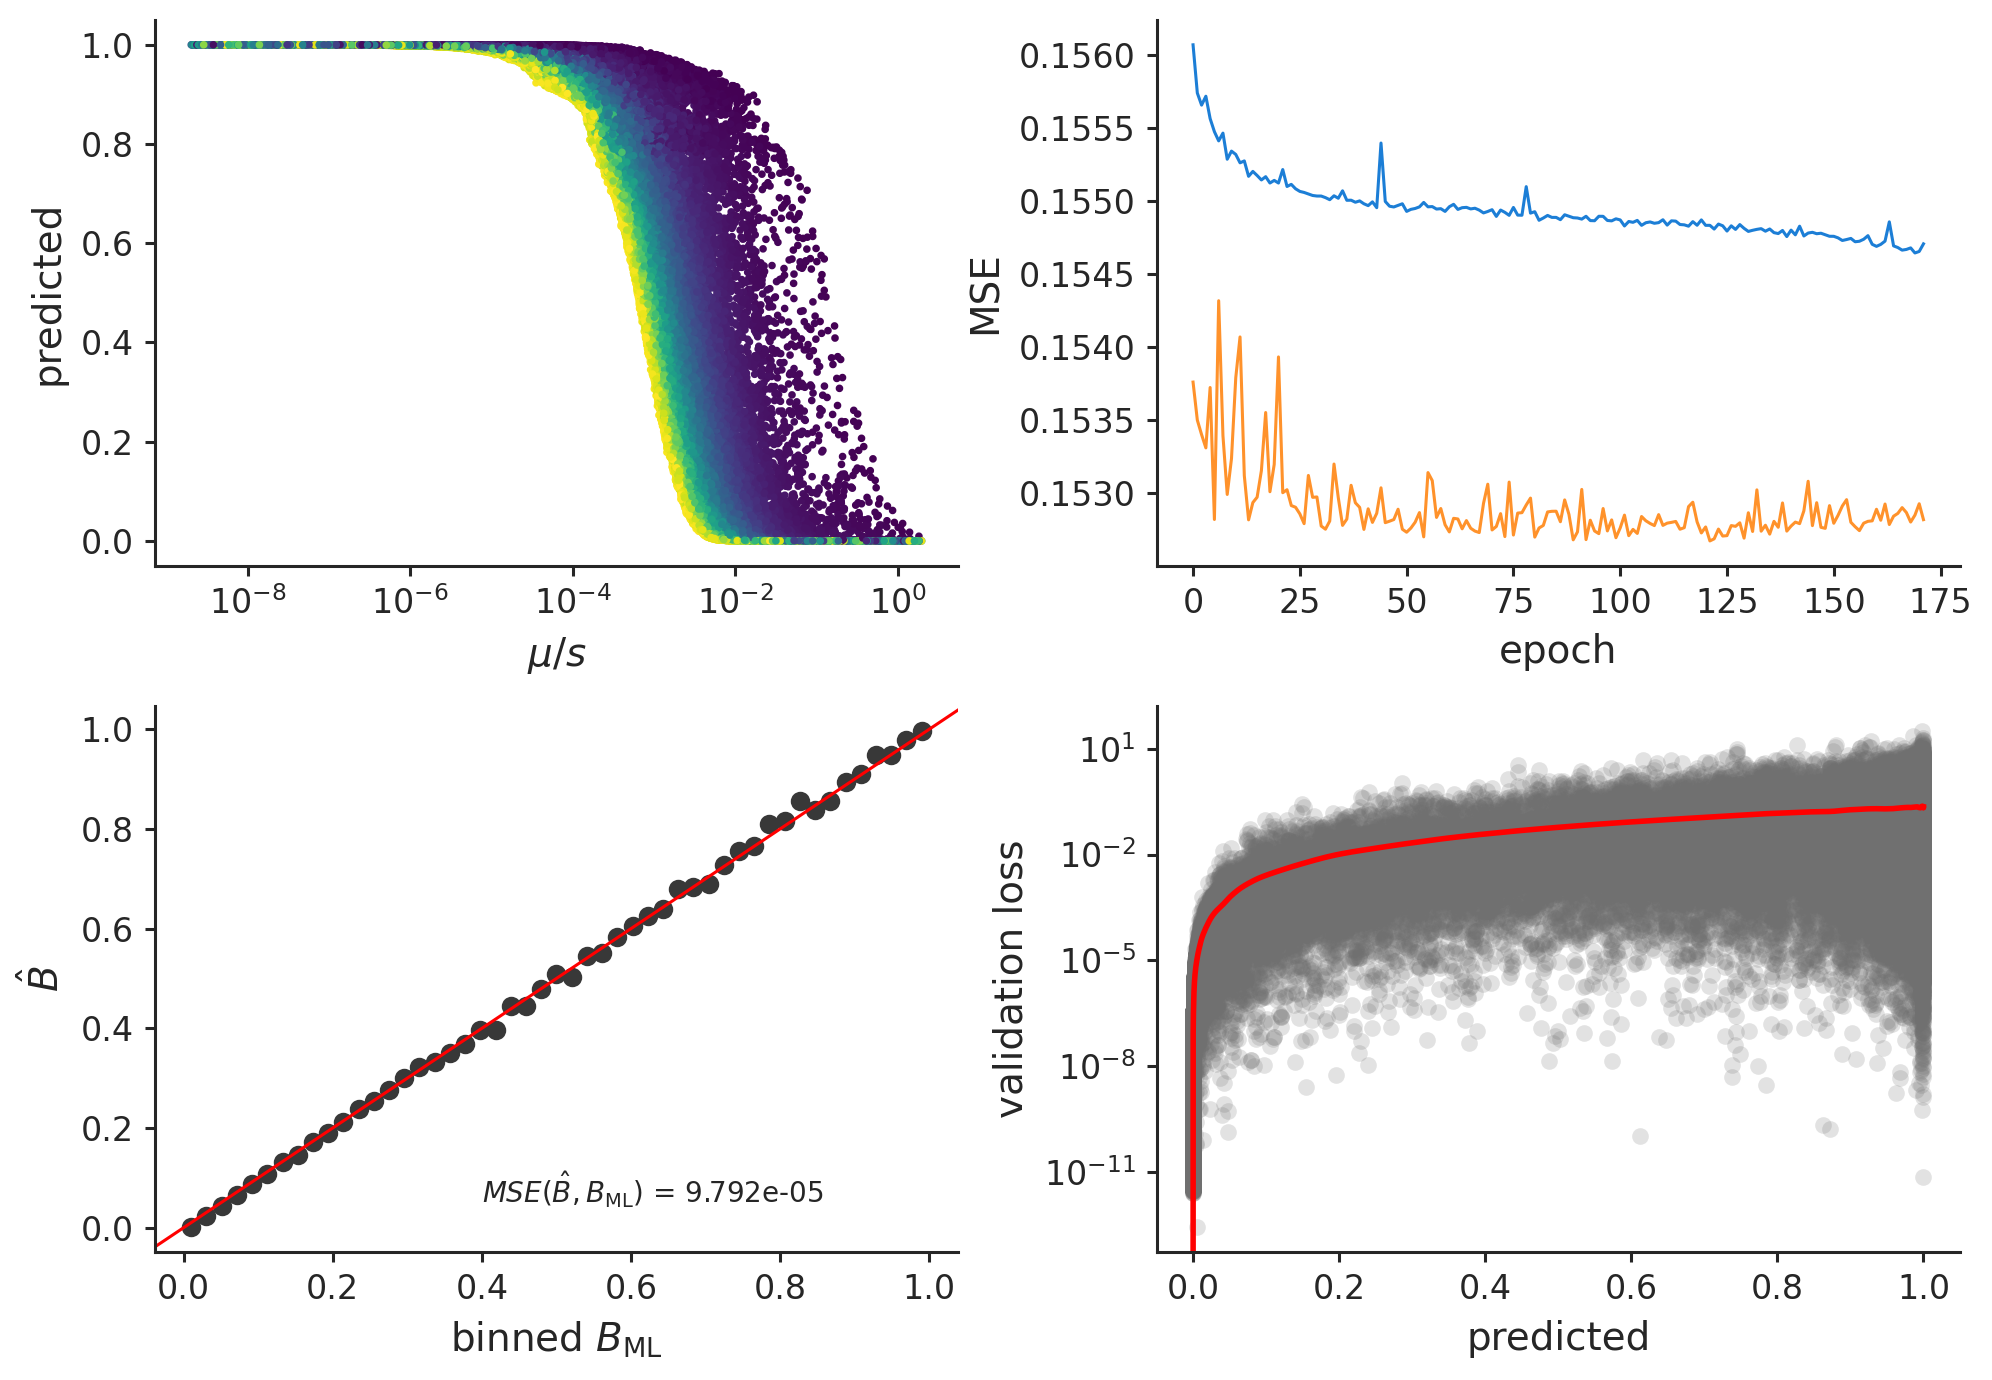

In [77]:
b_learn_diagnostic_plot(res['segment_best'][ARCH][0], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)

Notice there is some wonkiness going on around $\mu/s \approx 10^{-4}$. Let's look at the other training run on the same data:

using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

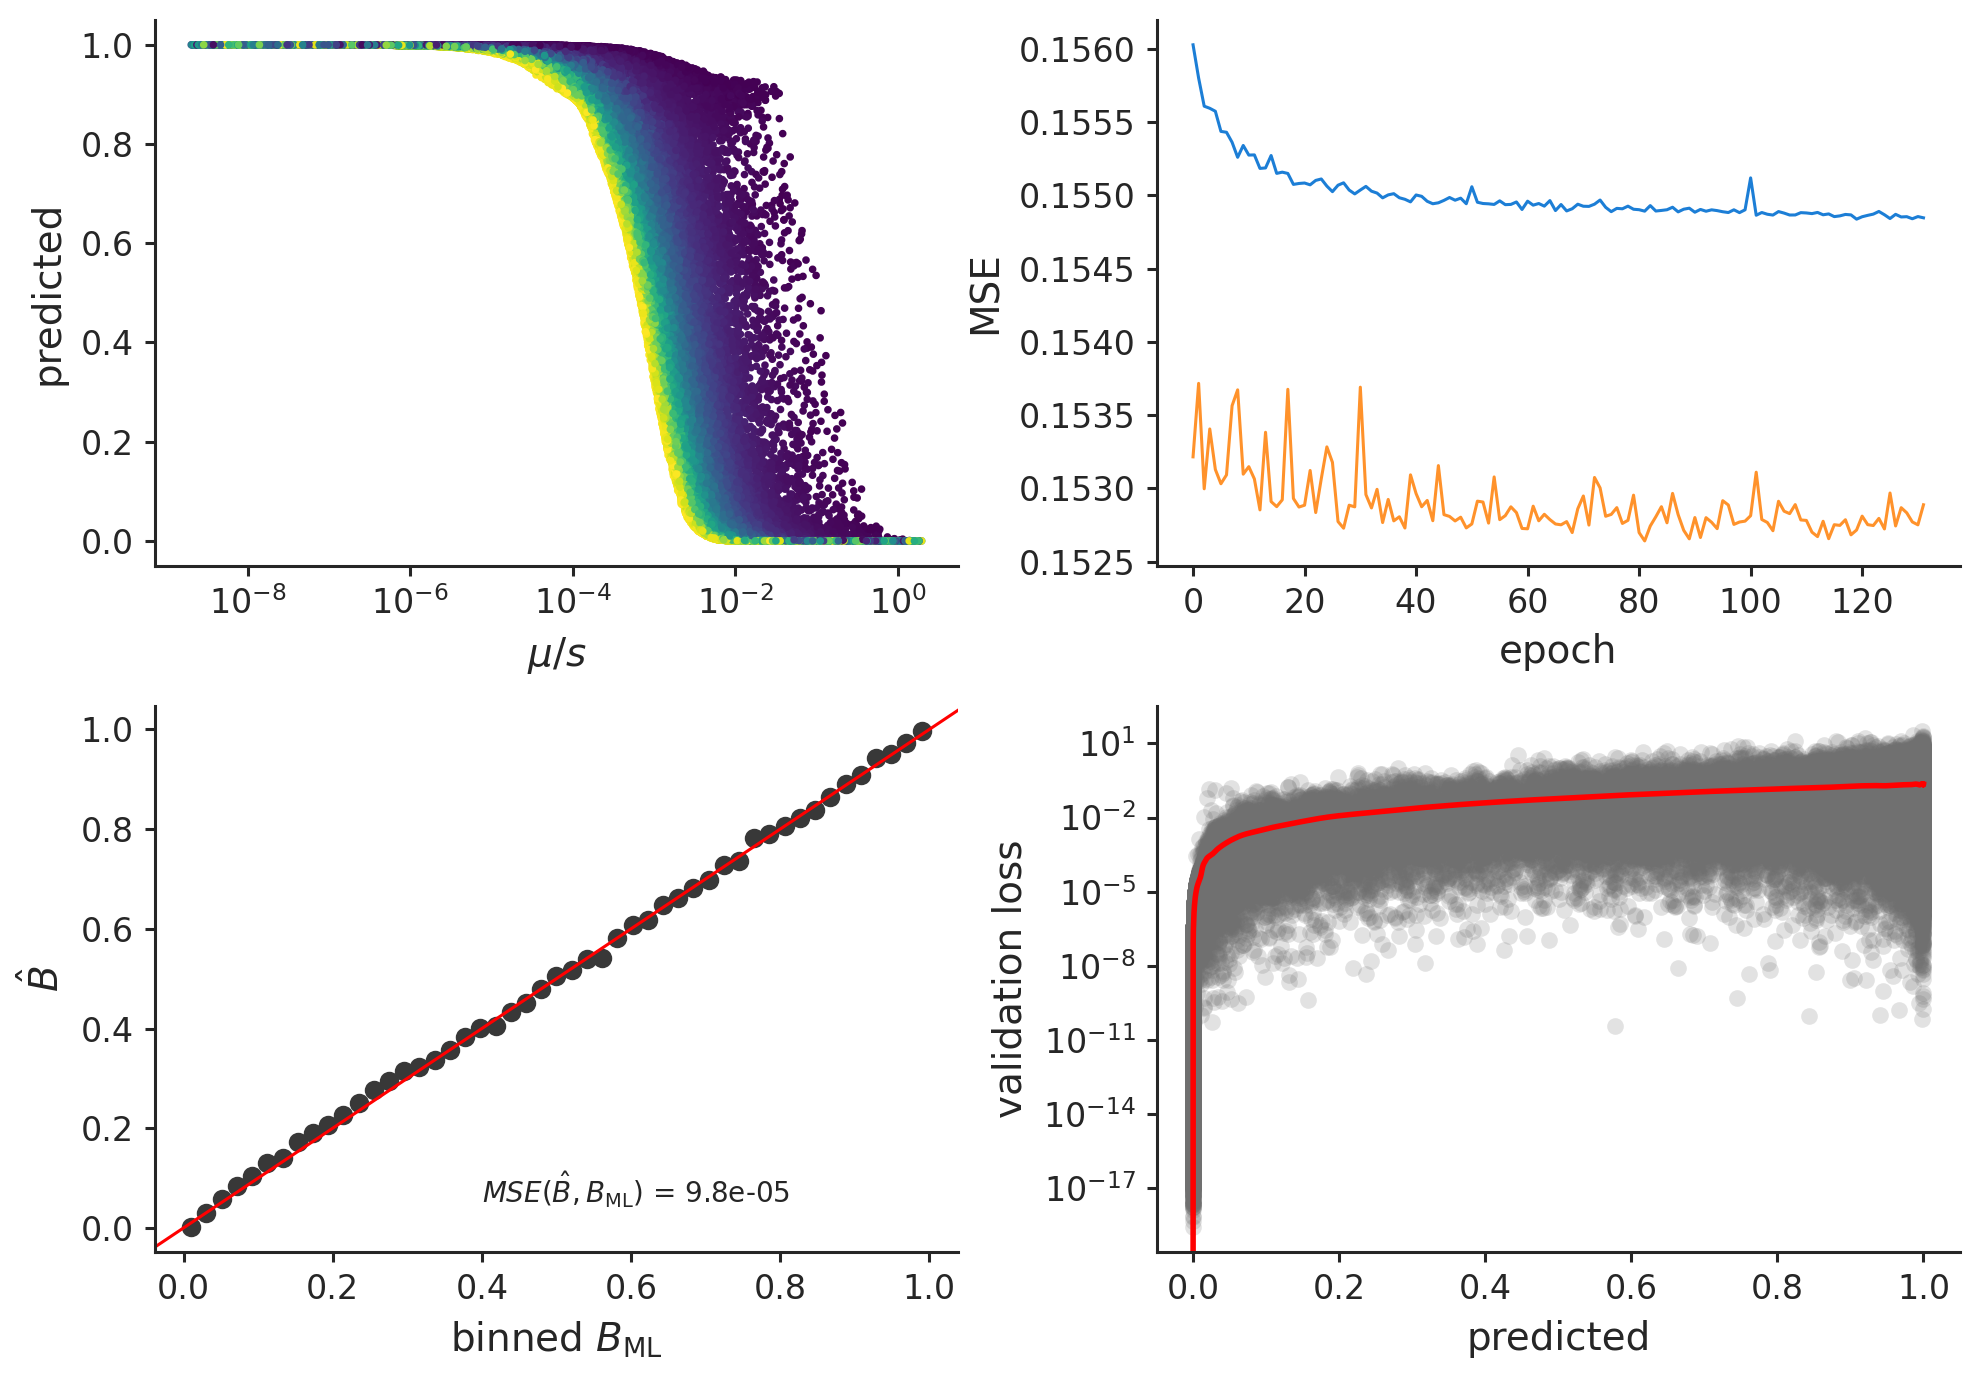

In [76]:
b_learn_diagnostic_plot(res['segment_best'][ARCH][1], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)

It also appears here. What's the density of training data across the rate?

(<Figure size 1600x800 with 2 Axes>,
 array([<AxesSubplot:xlabel='$\\mu/s$', ylabel='density'>,
        <AxesSubplot:xlabel='$B_\\mathrm{theory}$', ylabel='density'>],
       dtype=object))

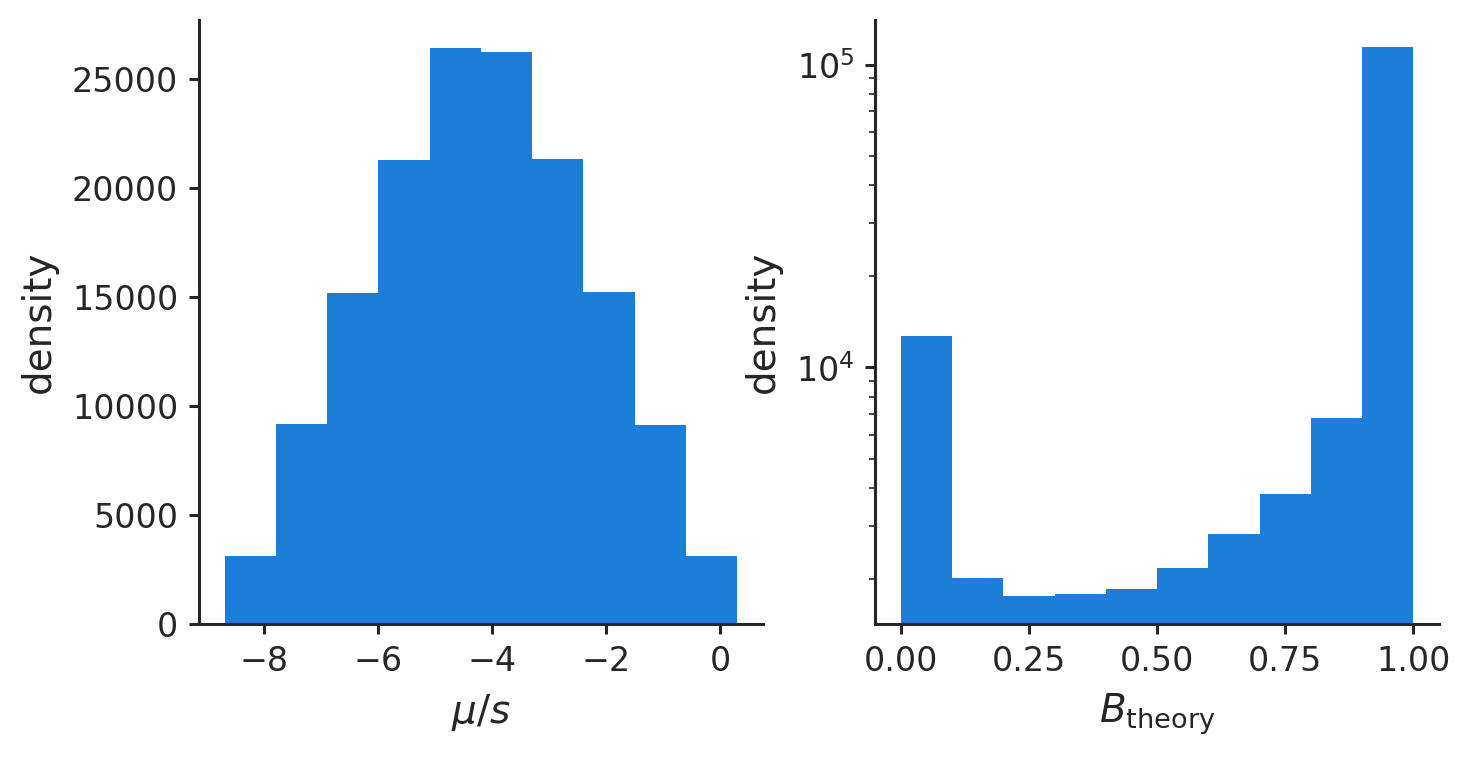

In [143]:
rate_density_plot(res['segment_best'][ARCH][0])

What if we increase the sample size to 1M?

using cached predictions
using cached predictions
using cached predictions
using cached predictions


(<Figure size 2000x1400 with 4 Axes>,
 ((<AxesSubplot:xlabel='$\\mu/s$', ylabel='predicted'>,
   <AxesSubplot:xlabel='epoch', ylabel='MSE'>),
  (<AxesSubplot:xlabel='binned $B_\\mathrm{ML}$', ylabel='$\\hat{B}$'>,
   <AxesSubplot:xlabel='predicted', ylabel='validation loss'>)))

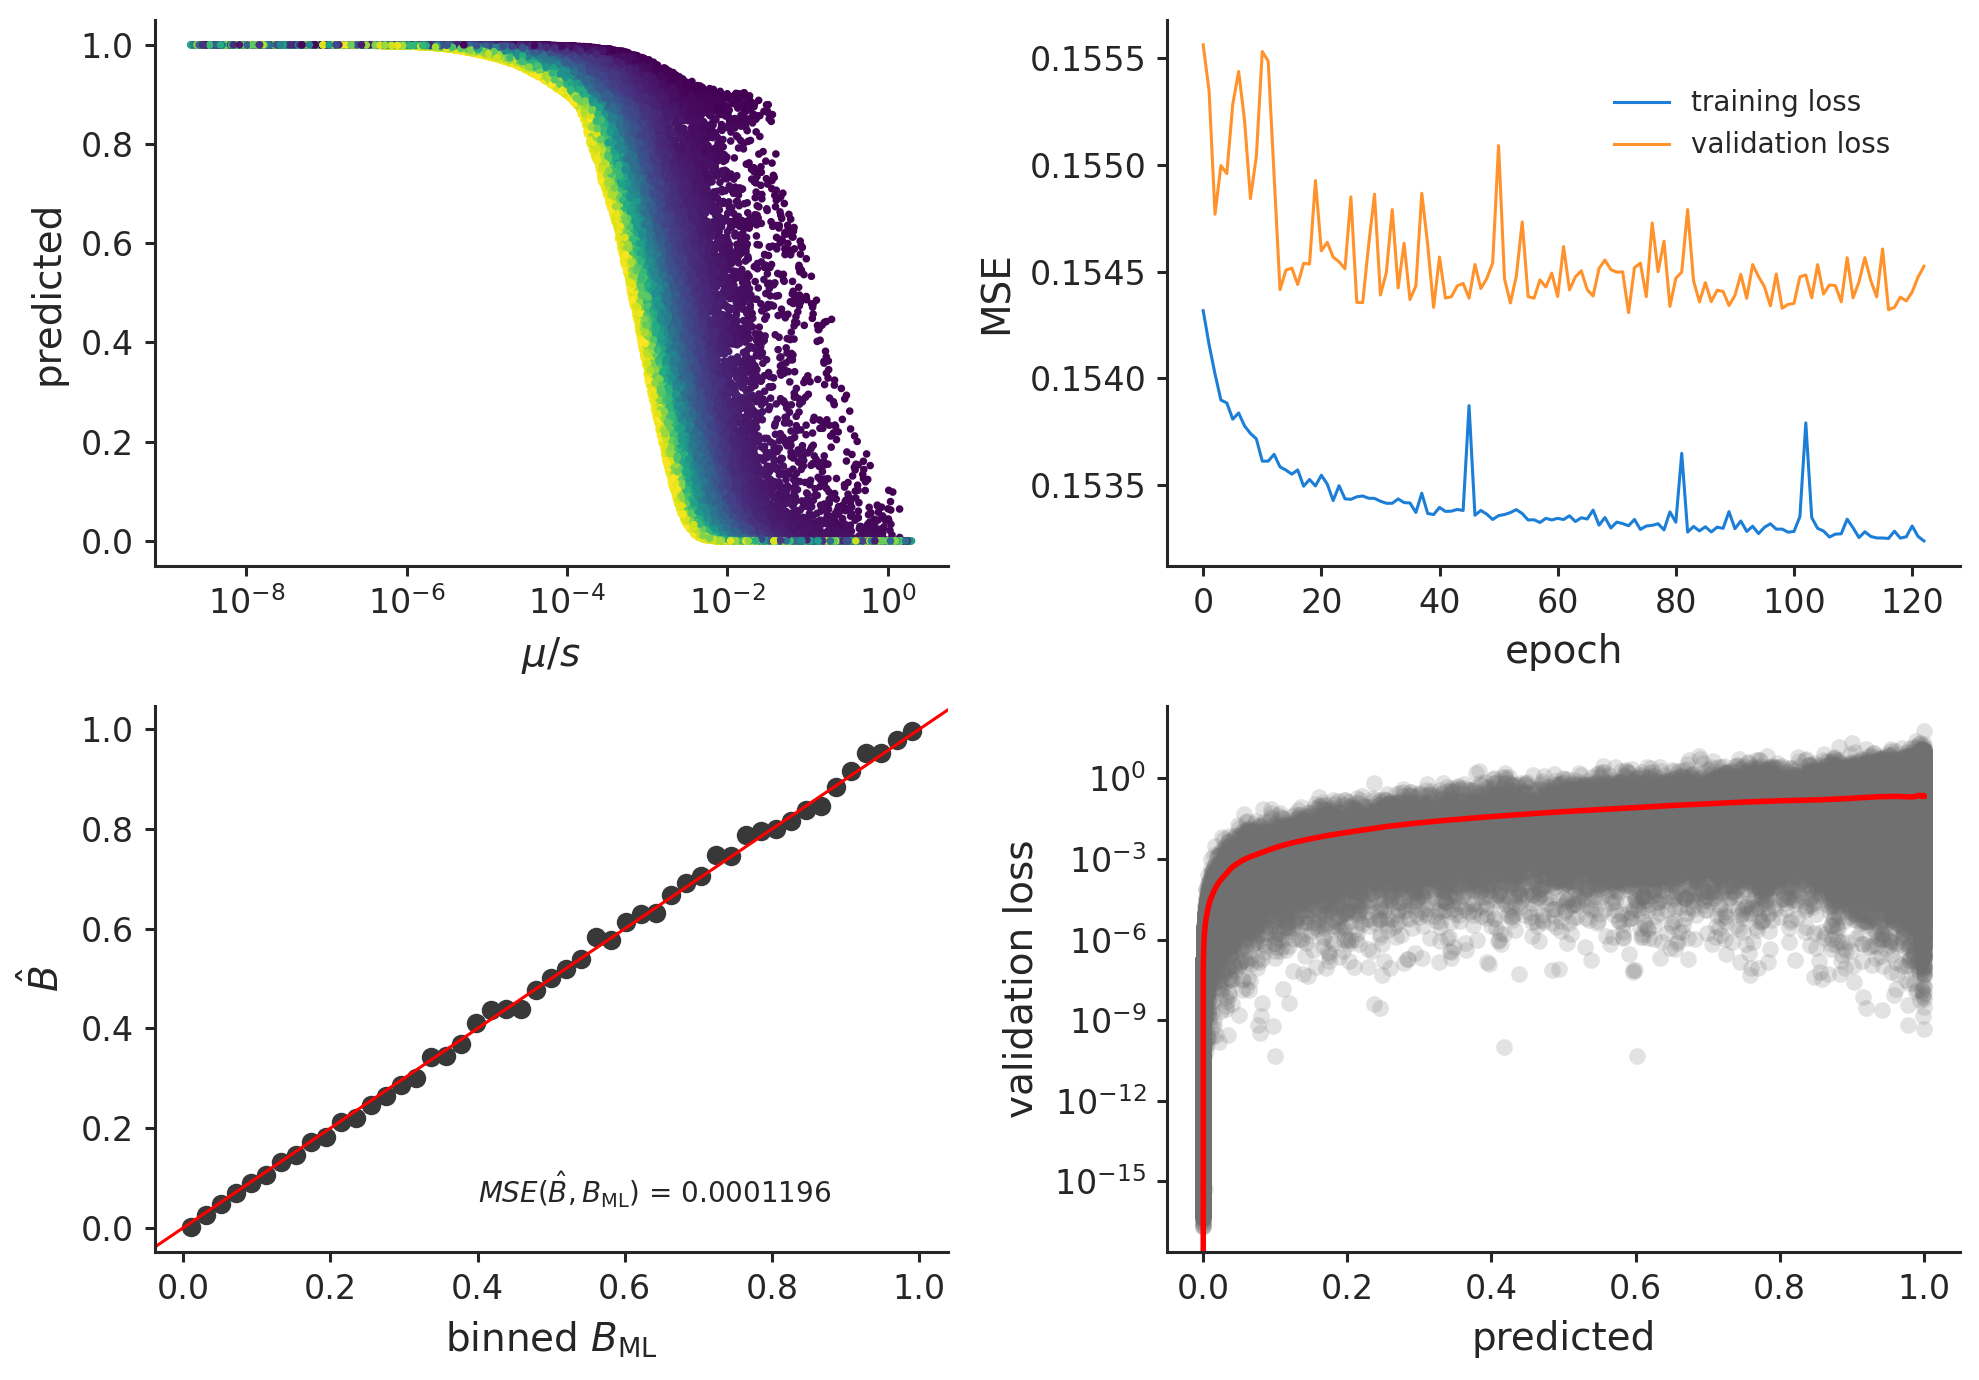

In [122]:
b_learn_diagnostic_plot(res['segment_best_largesample'][ARCH][1], n={'mu': 10, 'sh': 10, 'L':10, 'rbp':10, 'rf': 10}, c='L', add_theory=False)

using cached predictions
using cached predictions


(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot:xlabel='$\\mu/s$', ylabel='binned MSE between\ntheory/predicted'>)

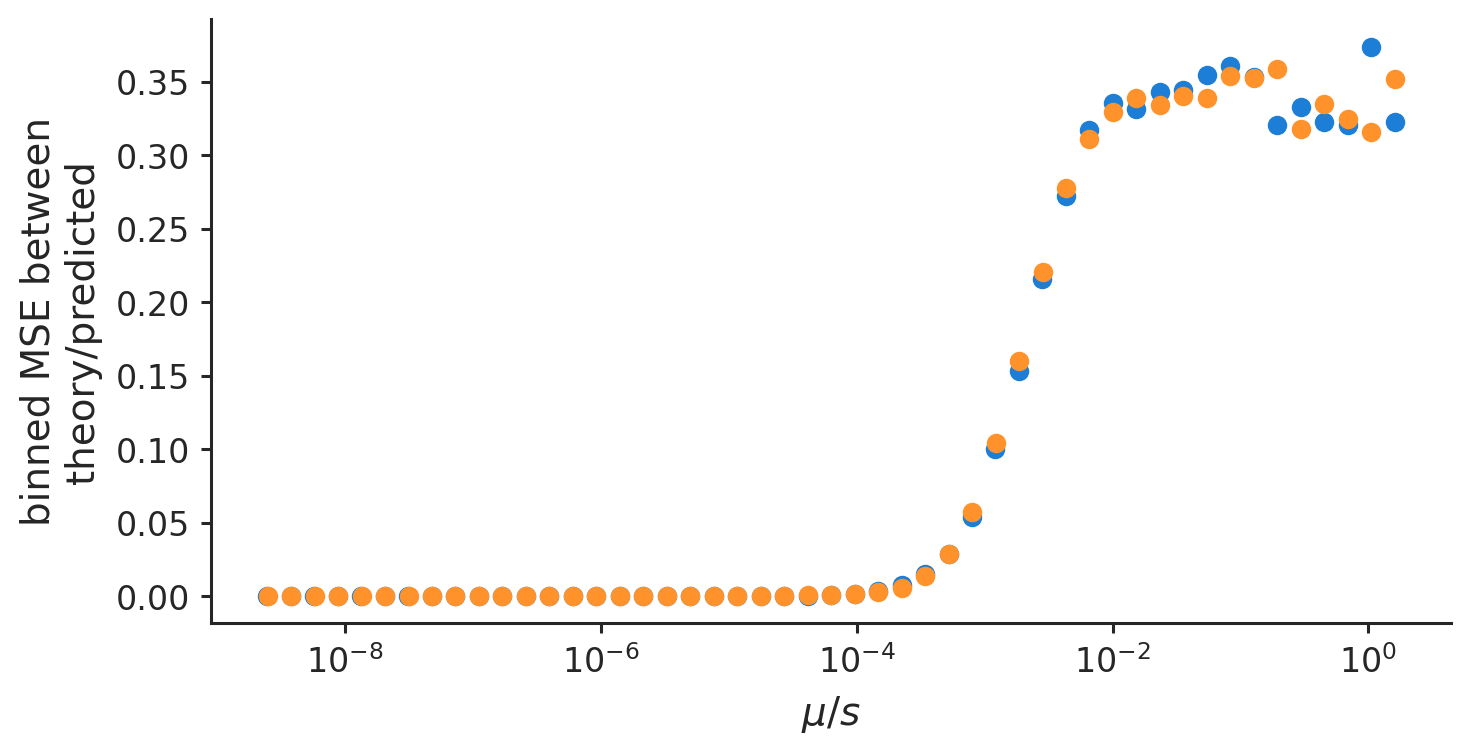

In [157]:
figax = rate_loss_plot(res['segment_best'][ARCH][0], 50)
rate_loss_plot(res['segment_best_largesample'][ARCH][0], 50, figax=figax)

using cached predictions
using cached predictions


(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot:xlabel='$B$', ylabel='binned MSE between\ntheory/predicted'>)

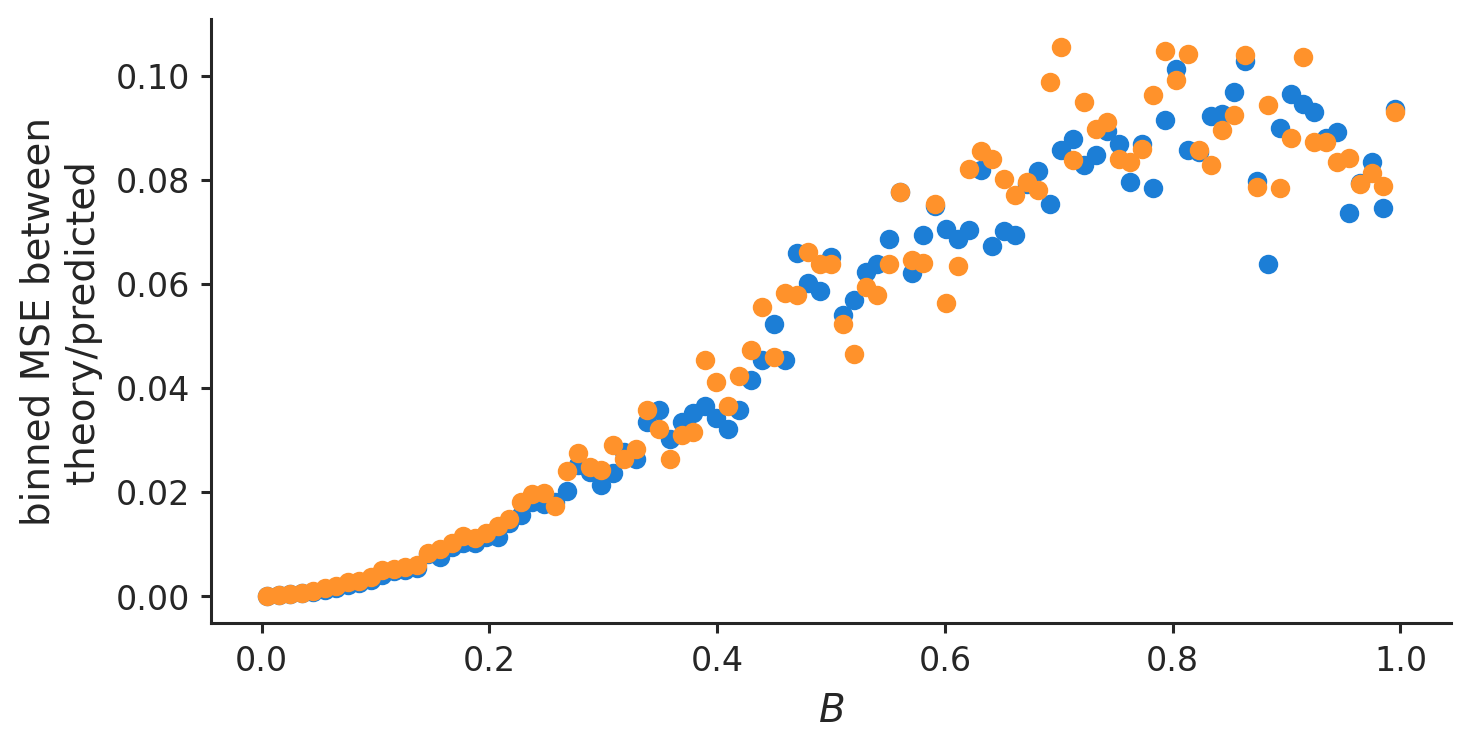

In [162]:
figax = B_loss_plot(res['segment_best'][ARCH][0], 100)
B_loss_plot(res['segment_best_largesample'][ARCH][0], 100, figax=figax)

In [165]:
x, y = res['segment_best'][ARCH][0].theory_B(), res['segment_best'][ARCH][0].predict_test()

using cached predictions


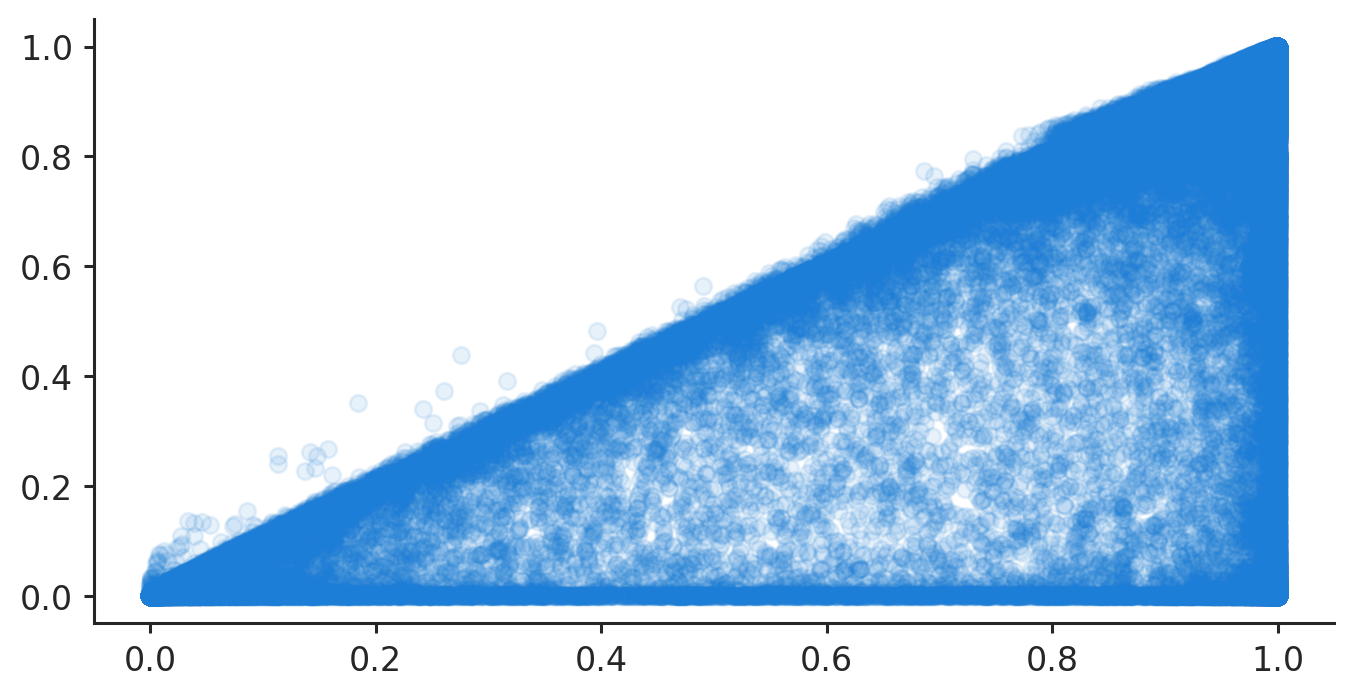

In [167]:
plt.scatter(x, y, alpha=0.1)